# Data cleaning and Exploratory Data Analysis

Pada notebook ini saya akan melakukan data cleaning dan meng-eksplorasi data se-detail mungkin, mendapatkan insight, dan membuat rekomendasi yang berguna untuk Pemerintah Nepal

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Import Libraries and Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_rows = 99
pd.options.display.max_columns = 99

In [3]:
bui = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Nepal/csv_building_structure.csv')
bui.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
0,120101000011,12,1207,120703,1,1,9,288,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair
1,120101000021,12,1207,120703,1,1,15,364,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Repaired and used,Grade 5,Reconstruction
2,120101000031,12,1207,120703,1,1,20,384,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
3,120101000041,12,1207,120703,1,1,20,312,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
4,120101000051,12,1207,120703,1,1,30,308,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 1,Minor repair


### Feature Description :
- 'building_id': A unique ID that identifies a unique building from the survey
- 'district_id': District where the building is located
- 'vdcmun_id': Municipality where the building is located
- 'ward_id': Ward Number in which the building is located
- 'count_floors_pre_eq': Number of floors that the building had before the earthquake 
- 'count_floors_post_eq': Number of floors that the building had after the earthquake
- 'age_building': Age of the building (in years)
- 'plinth_area_sq_ft': Plinth area of the building (in square feet)
- 'height_ft_pre_eq': Height of the building before the earthquake (in feet)
- 'height_ft_post_eq': Height of the building after the earthquake (in feet)
- 'land_surface_condition': Surface condition of the land in which the building is built
- 'foundation_type': Type of foundation used in the building
- 'roof_type': Type of roof used in the building
- 'ground_floor_type': Ground floor type 
- 'other_floor_type': Type of construction used in other floors (except ground floor and roof)
- 'position': Position of the building
- 'plan_configuration': Building plan configuration
- 'has_superstructure_adobe_mud': Flag variable that indicates if the superstructure of the building is made of Adobe/Mud (0: No, 1: Yes)
- 'has_superstructure_mud_mortar_stone': Flag variable that indicates if the superstructure of the building is made of Mud Mortar - Stone
- 'has_superstructure_stone_flag': Flag variable that indicates if the superstructure of the building is made of Stone
- 'has_superstructure_cement_mortar_stone': Flag variable that indicates if the superstructure of the building is made of Stone
- 'has_superstructure_mud_mortar_brick': Flag variable that indicates if the superstructure of the building is made of Cement Mortar - Stone
- 'has_superstructure_cement_mortar_brick': Flag variable that indicates if the superstructure of the building is made of Mud Mortar - Brick 
- 'has_superstructure_timber': Flag variable that indicates if the superstructure of the building is made of Timber
- 'has_superstructure_bamboo': Flag variable that indicates if the superstructure of the building is made of Bamboo
- 'has_superstructure_rc_non_engineered': Flag variable that indicates if the superstructure of the building is made of RC (Non Engineered)
- 'has_superstructure_rc_engineered': Flag variable that indicates if the superstructure of the building is made of RC (Engineered)
- 'has_superstructure_other': Flag variable that indicates if the superstructure of the building is made of any other material
- 'condition_post_eq': Actual contition of the building after the earthquake
- 'damage_grade': Damage grade assigned to the building by the surveyor after assessment
- 'technical_solution_proposed': Technical solution proposed by the surveyor after assessment

In [4]:
war = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Nepal/ward_vdcmun_district_name_mapping.csv')
war.head()

## war berisi feature nama kotamadya, nama district, saya masukan data ini untuk mensupport eksplorasi data

,ward_id,vdcmun_id,vdcmun_name,district_id,district_name
0,120101,1201,Champadevi Rural Municipality,12,Okhaldhunga
1,120102,1201,Champadevi Rural Municipality,12,Okhaldhunga
2,120103,1201,Champadevi Rural Municipality,12,Okhaldhunga
3,120104,1201,Champadevi Rural Municipality,12,Okhaldhunga
4,120105,1201,Champadevi Rural Municipality,12,Okhaldhunga


## Describe Data

In [5]:
bui.describe()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
count,7.594280e+05,759428.000000,759428.000000,759428.000000,759428.000000,759428.000000,759428.000000,759428.000000,759428.000000,759428.000000,759428.000000,759428.000000,759428.000000,759428.000000,759428.000000,759428.000000,759428.000000,759428.000000,759428.000000,759428.000000,759428.000000
mean,2.607579e+11,25.768474,2582.753669,258280.807782,2.088588,1.248116,24.346989,406.476085,16.054373,9.835491,0.042429,0.800869,0.035163,0.015766,0.022950,0.071279,0.258729,0.080376,0.039530,0.016232,0.012039
std,5.798925e+10,5.804610,580.877647,58087.835368,0.655029,1.061035,65.111244,226.488066,5.493835,8.553799,0.201567,0.399347,0.184193,0.124568,0.149745,0.257290,0.437937,0.271875,0.194852,0.126367,0.109061
min,1.201010e+11,12.000000,1201.000000,120101.000000,1.000000,0.000000,0.000000,70.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.220040e+11,22.000000,2204.000000,220402.000000,2.000000,0.000000,9.000000,280.000000,12.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.463010e+11,24.000000,2410.000000,241004.000000,2.000000,1.000000,16.000000,358.000000,16.000000,11.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.036060e+11,30.000000,3010.000000,301005.000000,2.000000,2.000000,27.000000,470.000000,18.000000,16.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,3.667090e+11,36.000000,3611.000000,361108.000000,9.000000,9.000000,999.000000,5000.000000,99.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
bui.describe(include='O')

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,condition_post_eq,damage_grade,technical_solution_proposed
count,759428,759428,759428,759428,759428,759427,759427,759428,759416,759416
unique,3,5,3,5,4,4,10,8,5,4
top,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Not used,Grade 5,Reconstruction
freq,629548,626952,502119,616387,485398,602329,728724,207026,275712,469339


In [7]:
datadesc = []
for i in bui.columns:
    datadesc.append([
        i,
        bui[i].dtypes,
        bui[i].isna().sum(),
        round((bui[i].isna().sum() / len(bui)) * 100),
        bui[i].nunique(),
        bui[i].drop_duplicates().sample(2).values
    ])
    
desc = pd.DataFrame(data=datadesc, columns=['Data Features','Data Types','Null','% Null','Nunique','Unique_sample'])
desc

,Data Features,Data Types,Null,% Null,Nunique,Unique_sample
0,building_id,int64,0,0.0,759428,"[291409001871, 302605003051]"
1,district_id,int64,0,0.0,11,"[21, 24]"
2,vdcmun_id,int64,0,0.0,110,"[2813, 3102]"
3,ward_id,int64,0,0.0,945,"[240101, 200402]"
4,count_floors_pre_eq,int64,0,0.0,9,"[4, 6]"
5,count_floors_post_eq,int64,0,0.0,10,"[4, 7]"
6,age_building,int64,0,0.0,176,"[101, 162]"
7,plinth_area_sq_ft,int64,0,0.0,2127,"[4445, 1075]"
8,height_ft_pre_eq,int64,0,0.0,79,"[61, 52]"
9,height_ft_post_eq,int64,0,0.0,73,"[8, 10]"


- Ada missing value pada kolom position, plan_configuration, target (damage_grade) dan kolom technical_solution_proposed

In [8]:
## Saya buat 3 jenis kolom:
### 1. catData = kolom bertipe kategorikal (object)
### 2. numcatData = kolom bertipe kategorikal yang berformat angka
### 3. numData = kolom bertipe numerikal asli
catData = bui.select_dtypes(exclude = np.number).columns
numcatData = bui[['district_id', 'vdcmun_id', 'ward_id', 'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other']]
numData = bui[['count_floors_pre_eq', 'count_floors_post_eq', 'age_building', 'plinth_area_sq_ft', 'height_ft_pre_eq', 'height_ft_post_eq']]


In [9]:
import scipy.stats as ss
from collections import Counter

In [10]:
## Cek asosiasi data kategorikal dan data kategorikal
def cramers_v(x, y):
	confusion_matrix = pd.crosstab(x, y)
	chi2 = ss.chi2_contingency(confusion_matrix)[0]
	n = confusion_matrix.sum().sum()
	phi2 = chi2/n
	r, k = confusion_matrix.shape
	phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
	rcorr = r-((r-1)**2)/(n-1)
	kcorr = k-((k-1)**2)/(n-1)
	return np.sqrt(phi2corr/min((kcorr-1), (rcorr-1)))

## Data Cleaning
- Kita akan melakukan data cleaning dalam hal ini handling missing value (NaN)

- Setelah di cek ternyata tidak banyak terdapat missing value:
  - Kolom position: 1
  - Kolom plan_configuration: 1
  - Kolom damage_grade: 12
  - Kolom technical_solution_proposed: 12

- Karena jumlah nya sangat sedikit jadi saya akan dropna

In [11]:
bui.dropna(inplace=True)

In [12]:
bui.isna().sum()

building_id                               0
district_id                               0
vdcmun_id                                 0
ward_id                                   0
count_floors_pre_eq                       0
count_floors_post_eq                      0
age_building                              0
plinth_area_sq_ft                         0
height_ft_pre_eq                          0
height_ft_post_eq                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar

## Exploratory Data Analysis

### Univariate

#### age_building

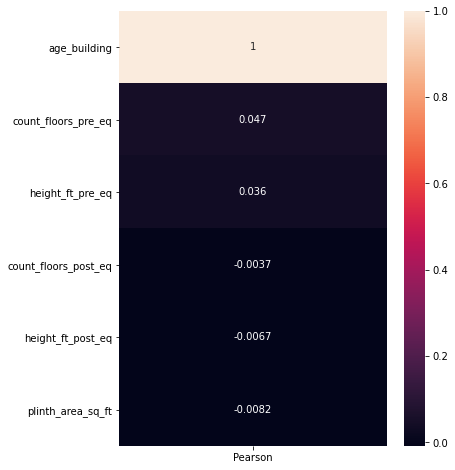

In [13]:
corrnum = []
for i in numData.columns:
  corrnum.append(bui.corr()['age_building'][i])

plt.figure(figsize = (6,8))
sns.heatmap(pd.DataFrame({'Pearson' : corrnum}, index = numData.columns).sort_values(ascending = False, by = 'Pearson'), annot = True)
plt.show()

In [14]:
bui['age_building'].describe()

count    759416.000000
mean         24.345610
std          65.102073
min           0.000000
25%           9.000000
50%          16.000000
75%          27.000000
max         999.000000
Name: age_building, dtype: float64

- Bangunan paling muda berusia < 1 tahun atau belum sampai usia 1 tahun
- Ada bangunan yang berusia 999, lebih lanjutnya saya akan cek, sekaligus cek outliers

In [15]:
## Cek ada outliers
Q1 = bui['age_building'].describe()['25%']
Q3 = bui['age_building'].describe()['75%']
IQR = Q3 - Q1
upper_fence = Q3 + (1.5 * IQR)
lower_fence = Q1 - (1.5 * IQR)
print('upper_fence:', upper_fence)
print('lower_fence:', lower_fence)
print('jumlah outlier di atas upper_fence:', len(bui[bui['age_building'] > upper_fence]))
print('jumlah outlier di bawah lower_fence:', len(bui[bui['age_building'] < lower_fence]))

upper_fence: 54.0
lower_fence: -18.0
jumlah outlier di atas upper_fence: 37948
jumlah outlier di bawah lower_fence: 0


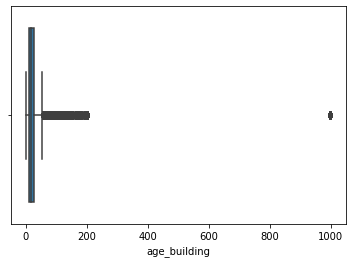

In [16]:
sns.boxplot(bui['age_building'])
plt.show()

In [17]:
bui['age_building'].unique()

array([  9,  15,  20,  30,  18,  13,   8,  22,  10,   3,   2,   7,  50,
        29,  25,  14,  23,  40,   1,  82,  35,  60,  45,  11,  32,  16,
        27,  12,  65,  33,   4,  24,  47,  99,   5,  70,  80,  44,  75,
        21,   6,  17,  58,  57,  19,  26,  28,  95,  90,  71,  55,  39,
        48,  42,  85,   0,  38,  52,  56,  59,  84,  46,  68, 105,  51,
        41,  62,  61,  36,  34,  78, 100,  54,  72,  31,  43,  37,  49,
        81,  53,  69, 187, 999,  66,  63, 102,  87,  79, 140,  88,  64,
       120,  93, 115,  86, 130, 160,  92,  77,  73,  67,  83,  76, 101,
       110, 176,  74, 200, 190, 150, 111, 119,  96,  98,  94,  91,  89,
       125, 167,  97, 123, 103, 180, 112, 133, 116, 145, 114, 121, 144,
       108, 122, 155, 172, 132, 131, 106, 148, 113, 109, 165, 118, 117,
       107, 170, 104, 162, 152, 127, 151, 146, 196, 126, 175, 138, 141,
       178, 128, 149, 164, 199, 135, 166, 168, 156, 161, 142, 185, 173,
       136, 177, 174, 124, 134, 193, 195])

- Bangunan yang berusia > 900 tahun biasanya adalah bangunan cagar budaya seperti candi, temple, pagoda, dan lainnya yang tentunya memiliki struktur dan bahan bangunan berbeda. Sedangkan bangunan dalam data ini berupa rumah penduduk, sekolah, rumah sakit, yang bukan cagar budaya. Maka dari itu saya akan membatasi usia bangunan hanya 0 - 200 tahun, karena bangunan yang lebih dari usia tersebut perlu survey lagi secara khusus

In [18]:
bui = bui[bui['age_building'] <= 200]

#### damage_grade dan damage_grade_bin

In [19]:
bui['damage_grade'].value_counts()

Grade 5    274582
Grade 4    182384
Grade 3    135107
Grade 2     86395
Grade 1     77808
Name: damage_grade, dtype: int64

In [20]:
## Saya akan binning 5 level ini menjadi 2 level untuk memudahkan dalam analisa dan modelling: 
### Grade 1-3: 'Low-Risk'
### Grade 4 dan 5: 'High-Risk'
bui['damage_grade_bin'] = bui['damage_grade'].map({'Grade 1' : 'Low-Risk', 'Grade 2' : 'Low-Risk', 'Grade 3' : 'Low-Risk', 'Grade 4' : 'High-Risk', 'Grade 5' : 'High-Risk'})
bui.head(3)

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed,damage_grade_bin
0,120101000011,12,1207,120703,1,1,9,288,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair,Low-Risk
1,120101000021,12,1207,120703,1,1,15,364,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Repaired and used,Grade 5,Reconstruction,High-Risk
2,120101000031,12,1207,120703,1,1,20,384,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair,Low-Risk


- Untuk selanjutnya saya akan gunakan kolom damage_grade_bin. Kolom damage_grade akan saya drop

In [21]:
bui.drop(columns=['damage_grade'], axis=1, inplace=True)

In [22]:
catData = bui.select_dtypes(exclude = np.number).columns

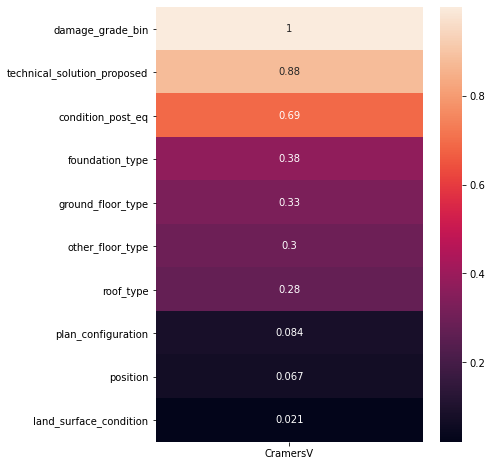

In [23]:
cramersEd = []

for i in catData:
    cramersEd.append(cramers_v(bui['damage_grade_bin'],bui[i]))

plt.figure(figsize = (6,8))
sns.heatmap(pd.DataFrame({'CramersV' : cramersEd}, index = catData).sort_values(ascending = False, by = 'CramersV'), annot = True)
plt.show()

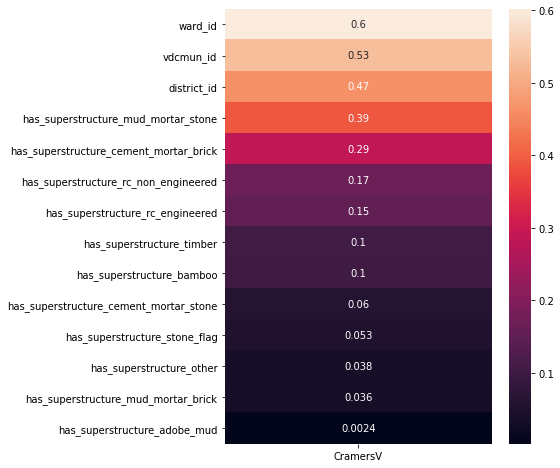

In [24]:
cramersEd = []

for i in numcatData:
    cramersEd.append(cramers_v(bui['damage_grade_bin'],bui[i]))

plt.figure(figsize = (6,8))
sns.heatmap(pd.DataFrame({'CramersV' : cramersEd}, index = numcatData.columns).sort_values(ascending = False, by = 'CramersV'), annot = True)
plt.show()

- Berdasarkan cek asosiasi saya menemukan kolom yang berasosiasi tinggi dengan kolom damage_grade_bin yaitu kolom technical_solution_proposed dan condition_post_eq. Setelah ditelaah 2 kolom ini memang dapat sangat menentukan level kerusakan bahkan tanpa mesin learning sekalipun, maka dari itu saya akan men-drop kolom technical_solution_proposed dan condition_post_eq saat feature selection
 

In [25]:
bui['damage_grade_bin'].describe()

count        756276
unique            2
top       High-Risk
freq         456966
Name: damage_grade_bin, dtype: object

In [26]:
bui['damage_grade_bin'].unique()

array(['Low-Risk', 'High-Risk'], dtype=object)

In [27]:
bui['damage_grade_bin'].value_counts()

High-Risk    456966
Low-Risk     299310
Name: damage_grade_bin, dtype: int64

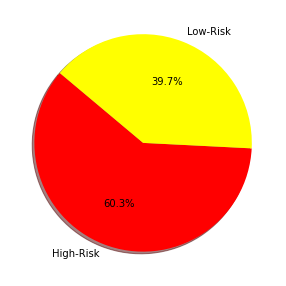

In [28]:
labels = 'High-Risk', 'Low-Risk'
sizes = [459610, 302484]
colors = ['red', 'yellow']
explode = (0,0)
plt.figure(figsize=(10,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

- 60.3% bangunan memiliki tingkat kerusakan di level High-Risk
- 39.7% bangunan memiliki tingkat kerusakan di level Low-Risk

#### count_floors_pre_eq dan post_eq

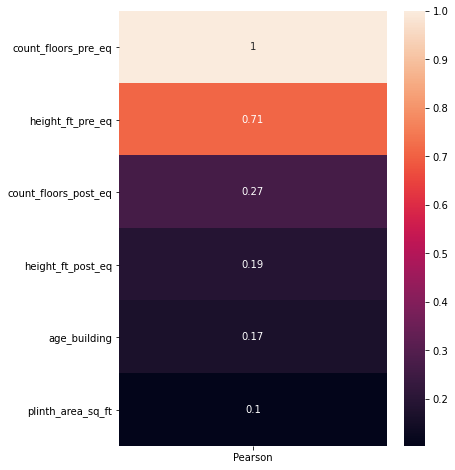

In [29]:
corrnum = []
for i in numData.columns:
  corrnum.append(bui.corr()['count_floors_pre_eq'][i])

plt.figure(figsize = (6,8))
sns.heatmap(pd.DataFrame({'Pearson' : corrnum}, index = numData.columns).sort_values(ascending = False, by = 'Pearson'), annot = True)
plt.show()

- Berdasarkan cek korelasi dengan kolom numerik lainnya. Kolom count_floors_pre_eq memiliki korelasi positif yang kuat dengan kolom height_ft_pre_eq. Memang secara logika semakin banyak jumlah lantai suatu bangunan maka akan semakin tinggi pula bangunan tersebut. Menurut saya, saya bisa menggunakan salah satu kolom saja saat feature selection untuk mencegah multicollinearity

In [30]:
bui['count_floors_pre_eq'].describe()

count    756276.000000
mean          2.088464
std           0.655264
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           9.000000
Name: count_floors_pre_eq, dtype: float64

In [31]:
bui['count_floors_pre_eq'].value_counts(normalize=True)*100

2    61.392005
3    21.961559
1    15.583596
4     0.798254
5     0.206274
6     0.043503
7     0.011504
9     0.001719
8     0.001587
Name: count_floors_pre_eq, dtype: float64

In [32]:
bui['count_floors_pre_eq'].value_counts().tail()

5    1560
6     329
7      87
9      13
8      12
Name: count_floors_pre_eq, dtype: int64

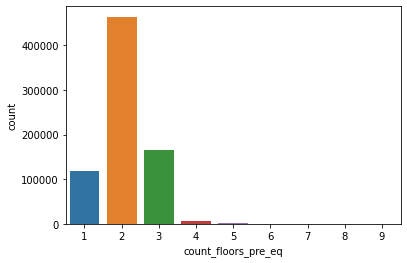

In [33]:
sns.countplot(bui['count_floors_pre_eq'])
plt.show()

- 61.4% bangunan dalam data ini memiliki 2 lantai
- Secara umum nya mayoritas bangunan dalam data ini memiliki 1 - 3 lantai
- Tetapi ada juga beberapa bangunan yang memiliki 7, 8, bahkan 9 lantai, meskipun jumlahnya sangat sedikit

In [34]:
bui['count_floors_post_eq'].describe()

count    756276.000000
mean          1.247968
std           1.060965
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max           9.000000
Name: count_floors_post_eq, dtype: float64

In [35]:
bui['count_floors_post_eq'].value_counts(normalize=True)*100

2    38.388631
0    34.412833
1    17.370510
3     8.964320
4     0.629797
5     0.182076
6     0.039139
7     0.010710
8     0.001190
9     0.000793
Name: count_floors_post_eq, dtype: float64

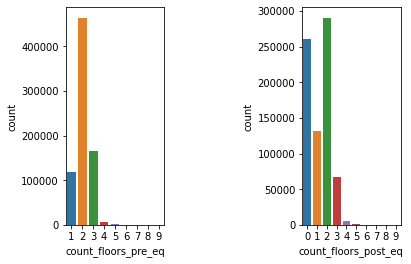

In [36]:
plt.subplot(1,3,1)
sns.countplot(bui['count_floors_pre_eq'])
plt.subplot(1,3,3)
sns.countplot(bui['count_floors_post_eq'])

plt.show()

- Perubahan yang sangat jelas terlihat adalah sebelum gempa tidak ada bangunan yang berlantai 0, karena memang sebuah bangunan minimalnya berlantai 1. Tetapi setelah gempa, ada bangunan yang berlantai 0 alias rata dengan tanah dan jumlah nya sekitar 260 ribu.
- Penurunan jumlah bangunan 2 lantai yang sebelum gempa jumlahnya di atas 400 ribu, setelah gempa menjadi sekitar 280 ribu
- Penurunan jumlah bangunan 3 lantai yang sebelum gempa jumlahnya sekitar 160 ribu, setelah gempa menjadi sekitar 70 ribu

#### height_ft_pre_eq dan post_eq

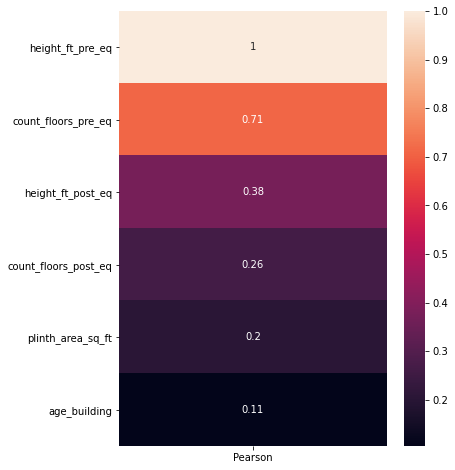

In [37]:
corrnum = []
for i in numData.columns:
  corrnum.append(bui.corr()['height_ft_pre_eq'][i])

plt.figure(figsize = (6,8))
sns.heatmap(pd.DataFrame({'Pearson' : corrnum}, index = numData.columns).sort_values(ascending = False, by = 'Pearson'), annot = True)
plt.show()

- Seperti yang sudah dibahas sebelumnya, kolom height_ft punya korelasi yang kuat positif dengan count_floors

In [38]:
bui['height_ft_pre_eq'].describe()

count    756276.000000
mean         16.051233
std           5.494539
min           6.000000
25%          12.000000
50%          16.000000
75%          18.000000
max          99.000000
Name: height_ft_pre_eq, dtype: float64

In [39]:
## Cek ada outliers
Q1 = bui['height_ft_pre_eq'].describe()['25%']
Q3 = bui['height_ft_pre_eq'].describe()['75%']
IQR = Q3 - Q1
upper_fence = Q3 + (1.5 * IQR)
lower_fence = Q1 - (1.5 * IQR)
print('upper_fence:', upper_fence)
print('lower_fence:', lower_fence)
print('jumlah outlier di atas upper_fence:', len(bui[bui['height_ft_pre_eq'] > upper_fence]))
print('jumlah outlier di bawah lower_fence:', len(bui[bui['height_ft_pre_eq'] < lower_fence]))

upper_fence: 27.0
lower_fence: 3.0
jumlah outlier di atas upper_fence: 16612
jumlah outlier di bawah lower_fence: 0


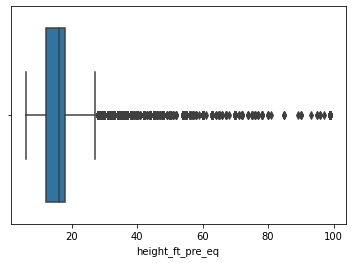

In [40]:
sns.boxplot(bui['height_ft_pre_eq'])
plt.show()

- Setelah di cek ternyata ada outliers. Tetapi saya akan keep karena tinggi bangunan sangat beragam

In [41]:
bui['height_ft_post_eq'].describe()

count    756276.000000
mean          9.832556
std           8.551376
min           0.000000
25%           0.000000
50%          11.000000
75%          16.000000
max          99.000000
Name: height_ft_post_eq, dtype: float64

In [42]:
## Cek ada outliers
Q1 = bui['height_ft_post_eq'].describe()['25%']
Q3 = bui['height_ft_post_eq'].describe()['75%']
IQR = Q3 - Q1
upper_fence = Q3 + (1.5 * IQR)
lower_fence = Q1 - (1.5 * IQR)
print('upper_fence:', upper_fence)
print('lower_fence:', lower_fence)
print('jumlah outlier di atas upper_fence:', len(bui[bui['height_ft_post_eq'] > upper_fence]))
print('jumlah outlier di bawah lower_fence:', len(bui[bui['height_ft_post_eq'] < lower_fence]))

upper_fence: 40.0
lower_fence: -24.0
jumlah outlier di atas upper_fence: 1567
jumlah outlier di bawah lower_fence: 0


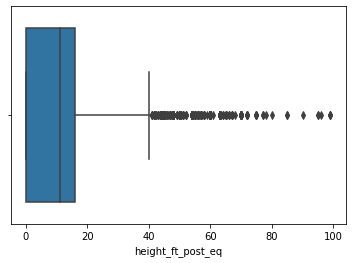

In [43]:
sns.boxplot(bui['height_ft_post_eq'])
plt.show()

In [44]:
len(bui[bui['height_ft_pre_eq'] == 0])

0

In [45]:
len(bui[bui['height_ft_post_eq'] == 0])

260256

- Perbedaan tinggi bangunan antara sebelum gempa dan sesudah gempa. Jika sebelum gempa bangunan paling pendek punya tinggi 6 feet atau sekitar 1.8 meter. Setelah gempa bangunan paling pendek punya tinggi 0 feet alias rata dengan tanah.

- Jika sebelum gempa bangunan dengan tinggi 0 feet berjumlah 0. Setelah gempa jumlahnya bertambah menjadi 260256. Artinya ada bangunan yang sebelumnya punya tinggi > 0 feet, kemudian setelah gempa menjadi rata dengan tanah

In [46]:
len(bui[bui['height_ft_pre_eq'] == 99])

304

In [47]:
len(bui[bui['height_ft_post_eq'] == 99])

3

- Perbedaan juga terlihat untuk bangunan paling tinggi. Jika sebelum gempa jumlah bangunan dengan tinggi 99 feet atau sekitar 30 meter berjumlah 304. Setelah gempa jumlah nya berkurang menjadi 3 bangunan saja

#### plinth_area_sq_ft

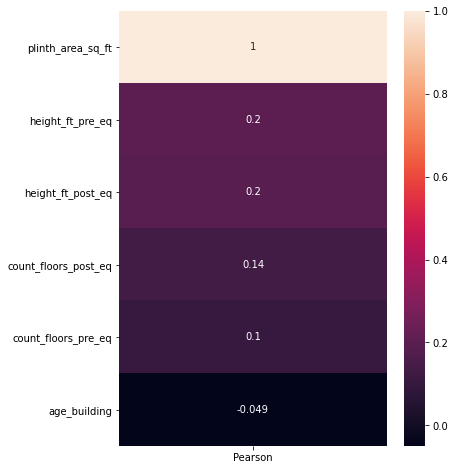

In [48]:
corrnum = []
for i in numData.columns:
  corrnum.append(bui.corr()['plinth_area_sq_ft'][i])

plt.figure(figsize = (6,8))
sns.heatmap(pd.DataFrame({'Pearson' : corrnum}, index = numData.columns).sort_values(ascending = False, by = 'Pearson'), annot = True)
plt.show()

In [49]:
bui['plinth_area_sq_ft'].describe()

count    756276.000000
mean        406.405528
std         226.390660
min          70.000000
25%         280.000000
50%         358.000000
75%         470.000000
max        5000.000000
Name: plinth_area_sq_ft, dtype: float64

In [50]:
## Cek ada outliers
Q1 = bui['plinth_area_sq_ft'].describe()['25%']
Q3 = bui['plinth_area_sq_ft'].describe()['75%']
IQR = Q3 - Q1
upper_fence = Q3 + (1.5 * IQR)
lower_fence = Q1 - (1.5 * IQR)
print('upper_fence:', upper_fence)
print('lower_fence:', lower_fence)
print('jumlah outlier di atas upper_fence:', len(bui[bui['plinth_area_sq_ft'] > upper_fence]))
print('jumlah outlier di bawah lower_fence:', len(bui[bui['plinth_area_sq_ft'] < lower_fence]))

upper_fence: 755.0
lower_fence: -5.0
jumlah outlier di atas upper_fence: 44202
jumlah outlier di bawah lower_fence: 0


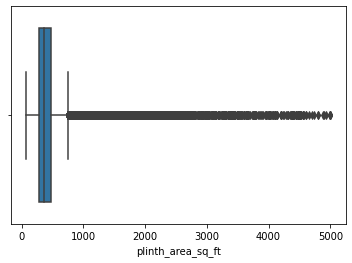

In [51]:
sns.boxplot(bui['plinth_area_sq_ft'])
plt.show()

- Setelah di cek ternyata ada outliers. Tetapi saya akan keep karena luas bangunan sangat beragam

#### district_id

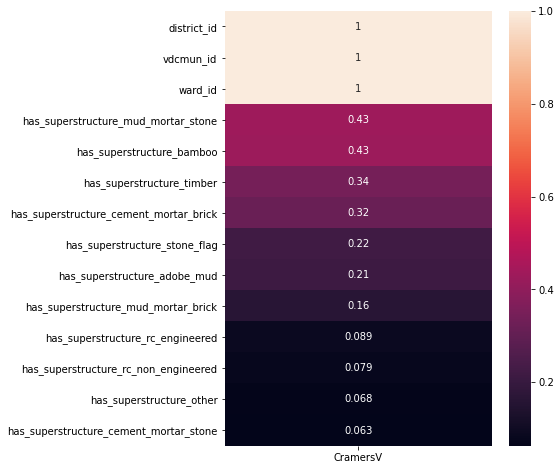

In [52]:
cramersEd = []

for i in numcatData:
    cramersEd.append(cramers_v(bui['district_id'],bui[i]))

plt.figure(figsize = (6,8))
sns.heatmap(pd.DataFrame({'CramersV' : cramersEd}, index = numcatData.columns).sort_values(ascending = False, by = 'CramersV'), annot = True)
plt.show()

- Berdasarkan cek asosiasi saya menemukan 2 kolom yang berasosiasi tinggi dengan district_id yaitu kolom vdcmun_id dan ward_id. Jika ditelaah memang ketiga ini adalah kolom yang berkaitan dengan lokasi bangunan. Karena memiliki nilai asosiasi 1, untuk mencegah multicolinearity saya memutuskan untuk men-drop kolom vdcmun_id dan ward_id saat feature selection.

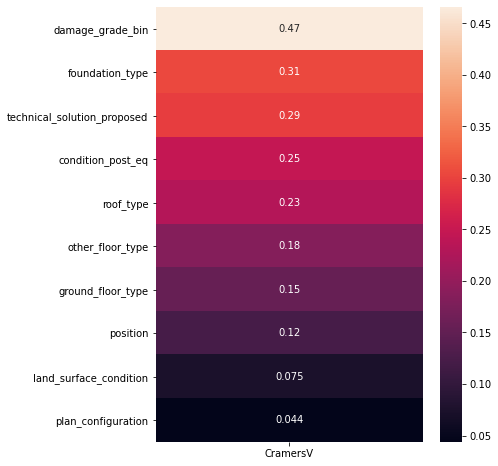

In [53]:
cramersEd = []

for i in catData:
    cramersEd.append(cramers_v(bui['district_id'],bui[i]))

plt.figure(figsize = (6,8))
sns.heatmap(pd.DataFrame({'CramersV' : cramersEd}, index = catData).sort_values(ascending = False, by = 'CramersV'), annot = True)
plt.show()

- Selain itu kolom district_id juga punya asosiasi yang cukup baik dengan kolom damage_grade_bin nilainya sebesar 0.47

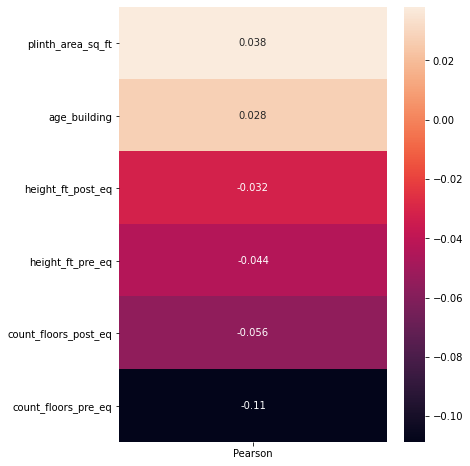

In [54]:
corrnum = []
for i in numData.columns:
  corrnum.append(bui.corr()['district_id'][i])

plt.figure(figsize = (6,8))
sns.heatmap(pd.DataFrame({'Pearson' : corrnum}, index = numData.columns).sort_values(ascending = False, by = 'Pearson'), annot = True)
plt.show()

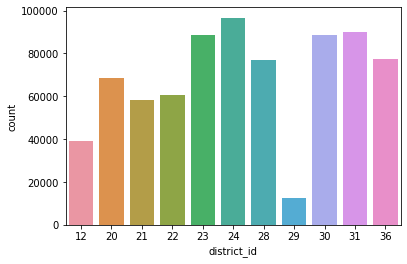

In [55]:
sns.countplot(bui['district_id'])
plt.show()

In [56]:
bui['district_id'].value_counts()

24    96637
31    89870
30    88599
23    88448
36    77482
28    76754
20    68418
22    60384
21    58192
12    39044
29    12448
Name: district_id, dtype: int64

In [57]:
war[war['district_id'] == 24]['district_name'].unique()

array(['Kavrepalanchok'], dtype=object)

In [58]:
war[war['district_id'] == 29]['district_name'].unique()

array(['Rasuwa'], dtype=object)

- Dalam data ini tercatat paling banyak jumlahnya dari distrik Kavrepalanchok
- Paling sedikit jumlah dari distrik Rasuwa

#### vdcmun_id

In [59]:
bui['vdcmun_id'].value_counts()

3104    32304
2005    15582
3009    15156
2802    15154
2001    14900
        ...  
2406     2729
2905     2606
2903     2417
2902     2213
2901     1976
Name: vdcmun_id, Length: 110, dtype: int64

In [60]:
war[war['vdcmun_id'] == 3104]['vdcmun_name'].unique()

array(['Hetauda Sub-Metropolitian City'], dtype=object)

In [61]:
war[war['vdcmun_id'] == 2901]['vdcmun_name'].unique()

array(['Aamachhodingmo Rural Municipality'], dtype=object)

- vdcmun dalam data ini adalah municipality atau wilayah-wilayah yang berada dalam suatu distrik

- Dalam data ini paling banyak wilayah Hetauda Sub-Metropolitan City dan yang paling sedikit wilayah Aamachhodingmo Rural Municipality

#### land_surface_condition

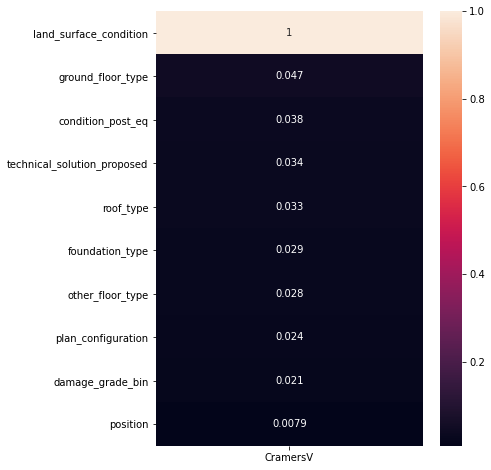

In [62]:
cramersEd = []

for i in catData:
    cramersEd.append(cramers_v(bui['land_surface_condition'],bui[i]))

plt.figure(figsize = (6,8))
sns.heatmap(pd.DataFrame({'CramersV' : cramersEd}, index = catData).sort_values(ascending = False, by = 'CramersV'), annot = True)
plt.show()

- Pada awalnya saya berasumsi land_surface_condition akan punya asosiasi yang cukup kuat dengan damage_grade_bin, ternyata data tidak mengatakan demikian. Keputusan lebih lanjut akan dibahas saat feature selection

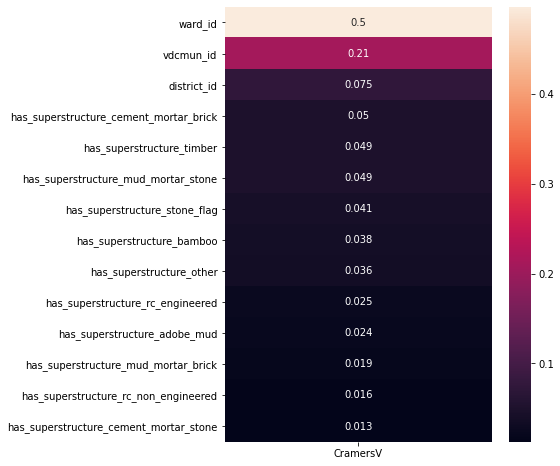

In [63]:
cramersEd = []

for i in numcatData:
    cramersEd.append(cramers_v(bui['land_surface_condition'],bui[i]))

plt.figure(figsize = (6,8))
sns.heatmap(pd.DataFrame({'CramersV' : cramersEd}, index = numcatData.columns).sort_values(ascending = False, by = 'CramersV'), annot = True)
plt.show()

In [64]:
bui['land_surface_condition'].unique()

array(['Flat', 'Moderate slope', 'Steep slope'], dtype=object)

- Flat: tanah datar
- Moderate slope: tanah dengan kemiringan sedang
- Steep slope: tanah dengan kemiringan curam

In [65]:
bui['land_surface_condition'].value_counts()

Flat              626687
Moderate slope    104945
Steep slope        24644
Name: land_surface_condition, dtype: int64

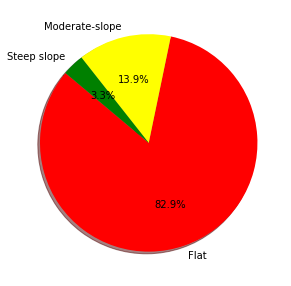

In [66]:
labels = 'Flat', 'Moderate-slope', 'Steep slope'
sizes = [628812, 105377, 24761]
colors = ['red', 'yellow', 'green']
explode = (0,0,0)
plt.figure(figsize=(10,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

- Mayoritas (82.9%) bangunan dalam data ini memiliki permukaan tanah yang flat/datar

#### foundation_type

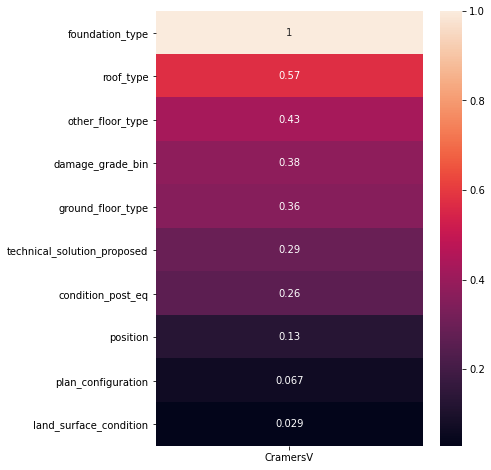

In [67]:
cramersEd = []

for i in catData:
    cramersEd.append(cramers_v(bui['foundation_type'],bui[i]))

plt.figure(figsize = (6,8))
sns.heatmap(pd.DataFrame({'CramersV' : cramersEd}, index = catData).sort_values(ascending = False, by = 'CramersV'), annot = True)
plt.show()

- Awalnya saya menduga foundation_type akan punya asosiasi yang tinggi dengan land_surface_condition. Tapi ternyata data tidak membuktikan demikian, yang tinggi asosiasinya justru kolom roof_type
- Selain itu kolom ini juga punya asosiasi yang lumayan dengan kolom damage_grade_bin

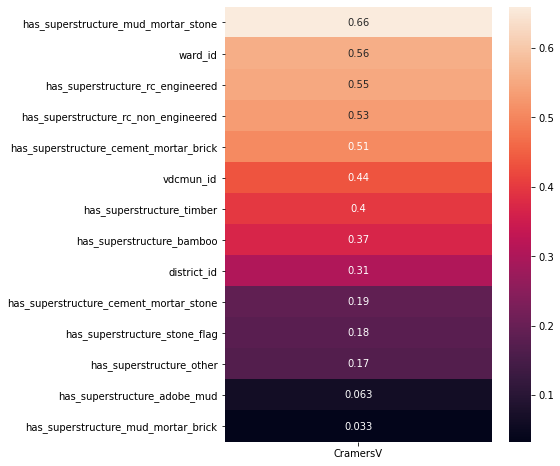

In [68]:
cramersEd = []

for i in numcatData:
    cramersEd.append(cramers_v(bui['foundation_type'],bui[i]))

plt.figure(figsize = (6,8))
sns.heatmap(pd.DataFrame({'CramersV' : cramersEd}, index = numcatData.columns).sort_values(ascending = False, by = 'CramersV'), annot = True)
plt.show()

- Kolom ini punya asosiasi paling tinggi dengan kolom has_superstructure_mud_mortar_stone. Asosiasi dengan kolom superstruktur lainnya juga terbilang tinggi. Hal ini memang sesuai dengan konsep bahwa bangunan terdiri dari 3 struktur yang saling berkaitan yaitu[1](https://blog-mue.blogspot.com/2016/03/definisi-struktur-dan-kontruksi.html): 
  1. struktur bawah (substruktur) adalah bagian-bagian bangunan yang terletak di bawah permukaan tanah. Struktur bawah ini meliputi pondasi dan sloof.
  2. Struktur tengah merupakan bagian-bagian bangunan yang terletak di atas permukaan tanah dan di bawah atap, serta layak ditinggali oleh manusia. Yang dimaksud struktur tengah di antaranya dinding, kolom, dan ring.
  3. Struktur atas (superstruktur) yaitu bagian-bagian bangunan yang terbentuk memanjang ke atas untuk menopang atap. Struktur atas bangunan antara lain rangka dan kuda-kuda.

In [69]:
bui['foundation_type'].value_counts()

Mud mortar-Stone/Brick    624118
Bamboo/Timber              57135
Cement-Stone/Brick         38822
RC                         31657
Other                       4544
Name: foundation_type, dtype: int64

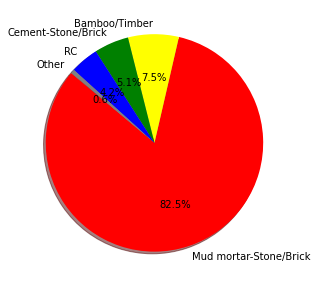

In [70]:
labels = 'Mud mortar-Stone/Brick', 'Bamboo/Timber', 'Cement-Stone/Brick', 'RC', 'Other'
sizes = [628705, 57472, 39245, 32120, 4552]
colors = ['red', 'yellow', 'green', 'blue','gray']
explode = (0,0,0,0,0)
plt.figure(figsize=(10,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

- Mayoritas (82.5%) bangunan menggunakan jenis pondasi dari campuran, lumpur mortar dan batu atau bata

#### roof type

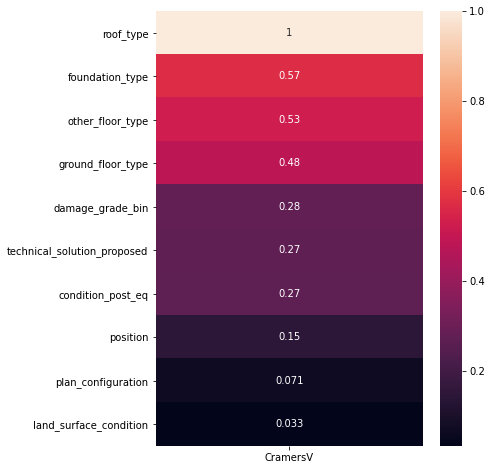

In [71]:
cramersEd = []

for i in catData:
    cramersEd.append(cramers_v(bui['roof_type'],bui[i]))

plt.figure(figsize = (6,8))
sns.heatmap(pd.DataFrame({'CramersV' : cramersEd}, index = catData).sort_values(ascending = False, by = 'CramersV'), annot = True)
plt.show()

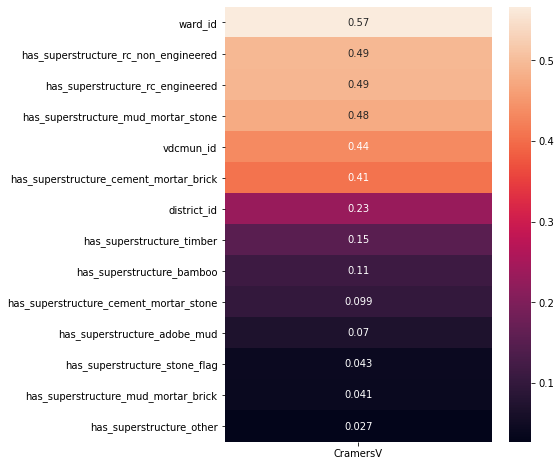

In [72]:
cramersEd = []

for i in numcatData:
    cramersEd.append(cramers_v(bui['roof_type'],bui[i]))

plt.figure(figsize = (6,8))
sns.heatmap(pd.DataFrame({'CramersV' : cramersEd}, index = numcatData.columns).sort_values(ascending = False, by = 'CramersV'), annot = True)
plt.show()

- Kolom roof_type punya asosiasi yang paling kuat dengan foundation_type
- Asosiasi dengan kolom damage_grade_bin tidak terlalu kuat tetapi masih di atas 0.2

In [73]:
bui['roof_type'].value_counts()

Bamboo/Timber-Light roof    499779
Bamboo/Timber-Heavy roof    212557
RCC/RB/RBC                   43940
Name: roof_type, dtype: int64

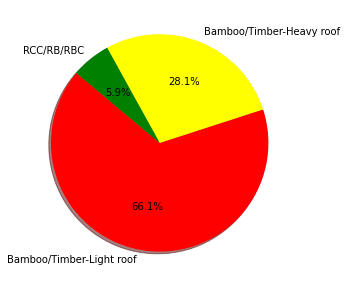

In [74]:
labels = 'Bamboo/Timber-Light roof', 'Bamboo/Timber-Heavy roof', 'RCC/RB/RBC'
sizes = [503736, 213774, 44584]
colors = ['red', 'yellow', 'green']
explode = (0,0,0)
plt.figure(figsize=(10,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

- Lebih dari separuh (66.1%) bangunan memiliki struktur atap yang dari bambu/kayu ringan

#### position

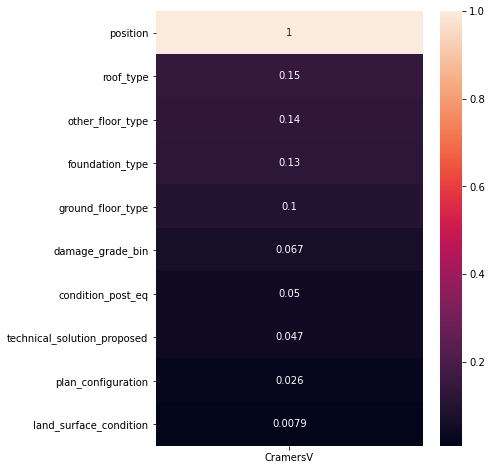

In [75]:
cramersEd = []

for i in catData:
    cramersEd.append(cramers_v(bui['position'],bui[i]))

plt.figure(figsize = (6,8))
sns.heatmap(pd.DataFrame({'CramersV' : cramersEd}, index = catData).sort_values(ascending = False, by = 'CramersV'), annot = True)
plt.show()

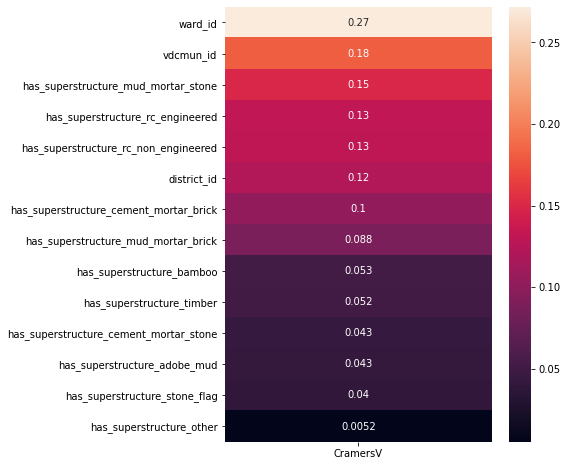

In [76]:
cramersEd = []

for i in numcatData:
    cramersEd.append(cramers_v(bui['position'],bui[i]))

plt.figure(figsize = (6,8))
sns.heatmap(pd.DataFrame({'CramersV' : cramersEd}, index = numcatData.columns).sort_values(ascending = False, by = 'CramersV'), annot = True)
plt.show()

- Kolom ini tidak punya asosiasi yang kuat dengan kolom lainnya termasuk dengan kolom (target) damage_grade_bin

In [77]:
bui['position'].value_counts()

Not attached       599937
Attached-1 side    128419
Attached-2 side     26620
Attached-3 side      1300
Name: position, dtype: int64

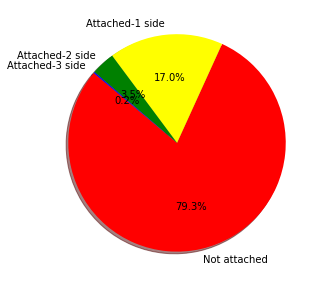

In [78]:
labels = 'Not attached', 'Attached-1 side', 'Attached-2 side', 'Attached-3 side'
sizes = [604443, 129431, 26910, 1310]
colors = ['red', 'yellow', 'green', 'blue']
explode = (0,0,0,0)
plt.figure(figsize=(10,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

- Makna dari posisi disini adalah:
  1. Not attached: bangunan berdiri sendiri, tidak bersentuhan atau bersebelahan dengan bangunan lain baik di kanan, kiri, atau belakang
  2. Attached-1 side: bangunan bersentuhan atau bersebelahan dengan bangunan lain di 1 sisi, bisa di sisi kiri, kanan, atau belakang
  3. Attached-2 side: bangunan bersentuhan dengan bangunan lain di 2 sisi, bisa di sisi kiri dan belakang atau kanan dan belakang
  4. Attached-3 side: bangunan bersentuhan dengan bangunan lain di 3 sisinya, kanan, kiri, dan belakang

- Dari data ini kita bisa melihat mayoritas (79.3%) bangunan dalam data ini memiliki posisi not attached artinya tidak bersentuhan dengan bangunan lain di sisi kanan, kiri, atau belakangnya (standalone)

#### plan_configuration

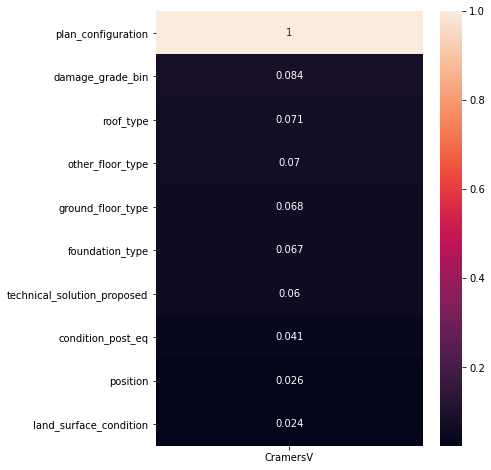

In [79]:
cramersEd = []

for i in catData:
    cramersEd.append(cramers_v(bui['plan_configuration'],bui[i]))

plt.figure(figsize = (6,8))
sns.heatmap(pd.DataFrame({'CramersV' : cramersEd}, index = catData).sort_values(ascending = False, by = 'CramersV'), annot = True)
plt.show()

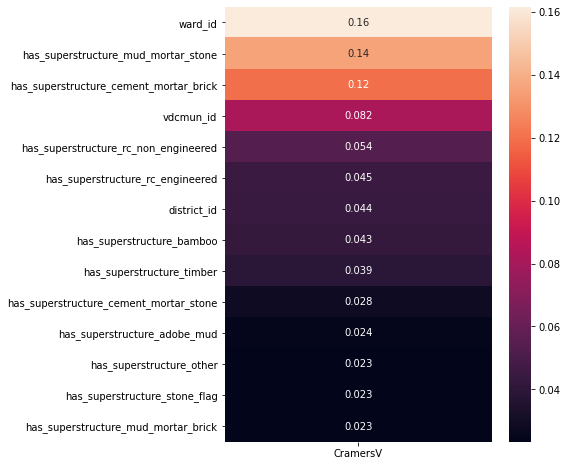

In [80]:
cramersEd = []

for i in numcatData:
    cramersEd.append(cramers_v(bui['plan_configuration'],bui[i]))

plt.figure(figsize = (6,8))
sns.heatmap(pd.DataFrame({'CramersV' : cramersEd}, index = numcatData.columns).sort_values(ascending = False, by = 'CramersV'), annot = True)
plt.show()

- Jika dibandingkan asosiasi kolom ini dan kolom lainnya. Kolom ini punya asosiasi yang cukup kuat dengan damage_grade_bin, meskipun angkanya kecil

In [81]:
bui['plan_configuration'].value_counts()

Rectangular                        725710
Square                              17426
L-shape                              9992
T-shape                               963
Multi-projected                       921
Others                                512
U-shape                               446
E-shape                               138
Building with Central Courtyard        89
H-shape                                79
Name: plan_configuration, dtype: int64

In [82]:
bui['plan_configuration'].value_counts(normalize=True)*100

Rectangular                        95.958354
Square                              2.304185
L-shape                             1.321211
T-shape                             0.127334
Multi-projected                     0.121781
Others                              0.067700
U-shape                             0.058973
E-shape                             0.018247
Building with Central Courtyard     0.011768
H-shape                             0.010446
Name: plan_configuration, dtype: float64

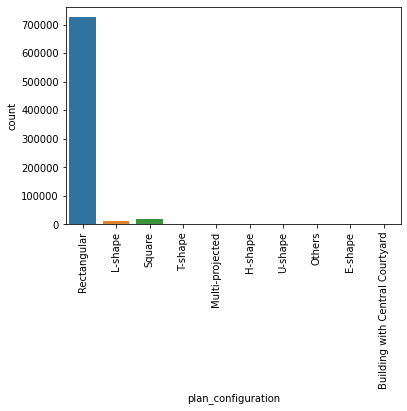

In [83]:
sns.countplot(bui['plan_configuration'])
plt.xticks(rotation=90)
plt.show()

- Plan configuration dalam bidang konstruksi sering disebut construction layout yang berisi rancangan layout suatu bangunan yang akan dibuat 
- Dari data ini hampir seluruh bangunan (96%) memiliki plan configuration berbentuk rectangular. Hal ini memang benar karena mayoritas bangunan di nepal memiliki gaya tradisional yang berbentuk rectangular

#### ground_floor_type

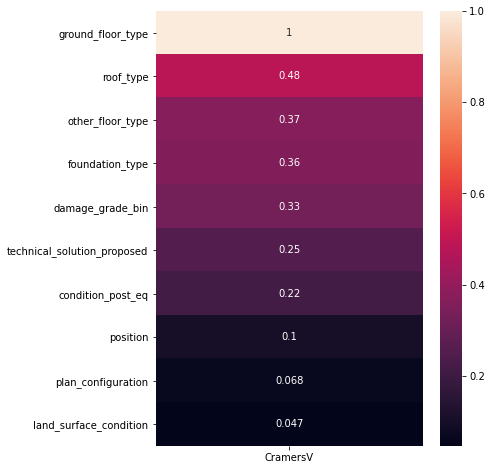

In [84]:
cramersEd = []

for i in catData:
    cramersEd.append(cramers_v(bui['ground_floor_type'],bui[i]))

plt.figure(figsize = (6,8))
sns.heatmap(pd.DataFrame({'CramersV' : cramersEd}, index = catData).sort_values(ascending = False, by = 'CramersV'), annot = True)
plt.show()

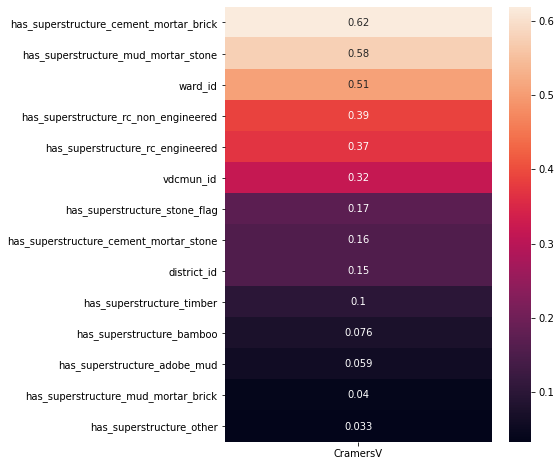

In [85]:
cramersEd = []

for i in numcatData:
    cramersEd.append(cramers_v(bui['ground_floor_type'],bui[i]))

plt.figure(figsize = (6,8))
sns.heatmap(pd.DataFrame({'CramersV' : cramersEd}, index = numcatData.columns).sort_values(ascending = False, by = 'CramersV'), annot = True)
plt.show()

In [86]:
bui['ground_floor_type'].value_counts()

Mud            613612
RC              72273
Brick/Stone     65776
Timber           3567
Other            1048
Name: ground_floor_type, dtype: int64

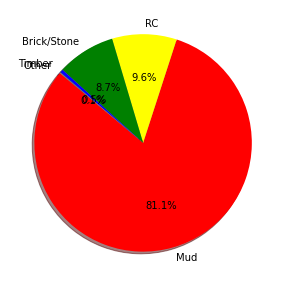

In [87]:
labels = 'Mud', 'RC', 'Brick/Stone', 'Timber', 'Other'
sizes = [618205, 73149, 66093, 3594, 1053]
colors = ['red', 'yellow', 'green', 'blue', 'gray']
explode = (0,0,0,0,0)
plt.figure(figsize=(10,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

- Mayoritas (81.1%) bangunan memiliki type ground floor dari mud

#### other_floor_type

In [88]:
bui['other_floor_type'].value_counts()

TImber/Bamboo-Mud    483147
Timber-Planck        122815
Not applicable       118210
RCC/RB/RBC            32104
Name: other_floor_type, dtype: int64

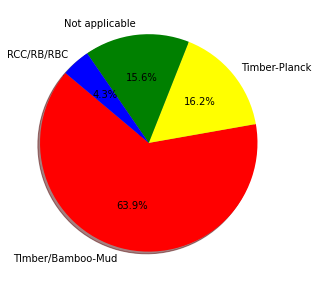

In [89]:
labels = 'TImber/Bamboo-Mud', 'Timber-Planck', 'Not applicable', 'RCC/RB/RBC'
sizes = [486907, 123624, 118821, 32742]
colors = ['red', 'yellow', 'green', 'blue']
explode = (0,0,0,0)
plt.figure(figsize=(10,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

- Lebih dari separuh (63.9%) bangunan yang memiliki lebih dari 1 lantai. Membuatnya dari bahan timber/bamboo 

#### superstructures

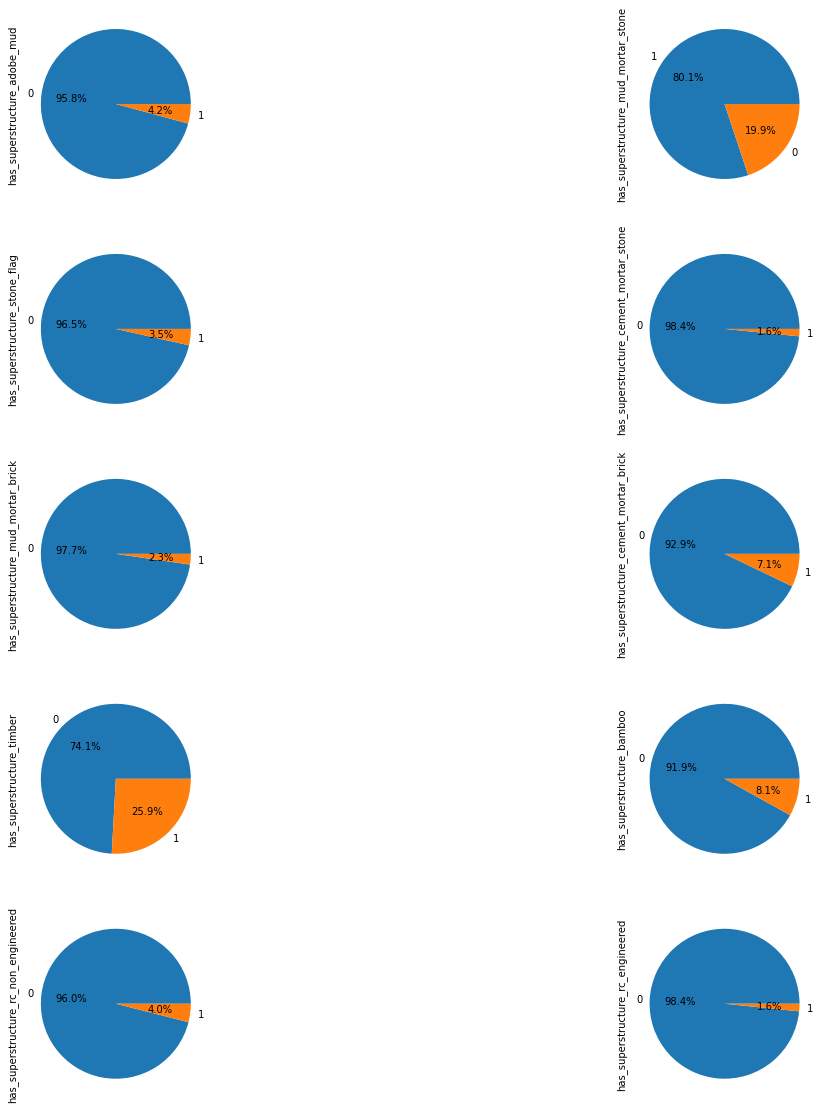

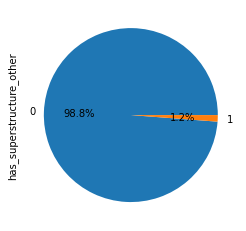

In [90]:
cols = [['has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone'], ['has_superstructure_stone_flag', 
        'has_superstructure_cement_mortar_stone'], ['has_superstructure_mud_mortar_brick', 
        'has_superstructure_cement_mortar_brick'], ['has_superstructure_timber', 'has_superstructure_bamboo'], 
        ['has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered']]

fig, axes = plt.subplots(ncols = 2, nrows = 5, figsize = (20,20))
for i, c in enumerate(cols):
    bui[c[0]].value_counts().plot.pie(autopct="%.1f%%", ax = axes[i][0])
    bui[c[1]].value_counts().plot.pie(autopct="%.1f%%", ax = axes[i][1])
plt.show()
bui['has_superstructure_other'].value_counts().plot.pie(autopct = "%.1f%%")
plt.show()

- Kolom ini punya binary value (0: No, 1: Yes)
- Dari plot di atas kita dapat melihat bahwa kebanyakan bangunan memiliki superstruktur dari mud_mortar_stone hal ini dikarenakan nepal memiliki banyak wilayah pedesaan(rural) yang masih menggunakan bangunan tradisional

#### condition_post_eq

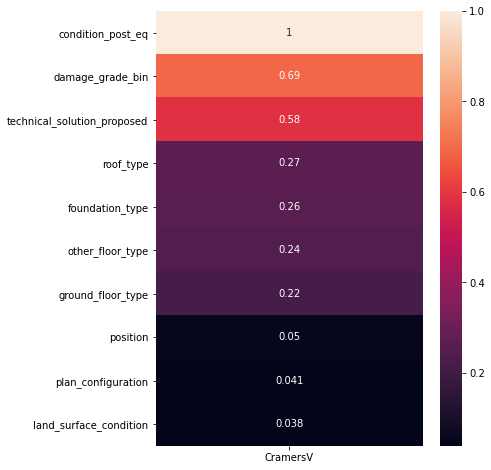

In [91]:
cramersEd = []

for i in catData:
    cramersEd.append(cramers_v(bui['condition_post_eq'],bui[i]))

plt.figure(figsize = (6,8))
sns.heatmap(pd.DataFrame({'CramersV' : cramersEd}, index = catData).sort_values(ascending = False, by = 'CramersV'), annot = True)
plt.show()

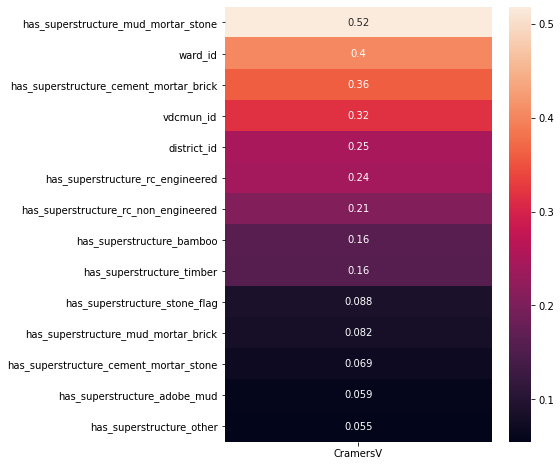

In [92]:
cramersEd = []

for i in numcatData:
    cramersEd.append(cramers_v(bui['condition_post_eq'],bui[i]))

plt.figure(figsize = (6,8))
sns.heatmap(pd.DataFrame({'CramersV' : cramersEd}, index = numcatData.columns).sort_values(ascending = False, by = 'CramersV'), annot = True)
plt.show()

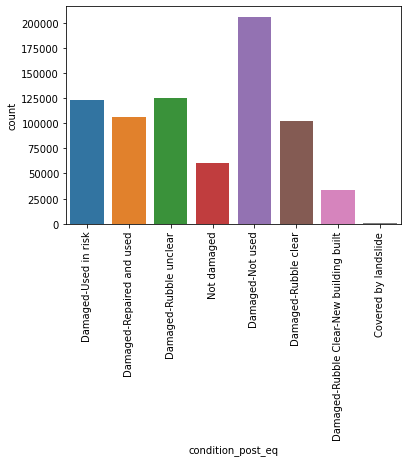

In [93]:
sns.countplot(bui['condition_post_eq'])
plt.xticks(rotation=90)
plt.show()

In [94]:
bui['condition_post_eq'].value_counts()

Damaged-Not used                           206234
Damaged-Rubble unclear                     125102
Damaged-Used in risk                       122676
Damaged-Repaired and used                  106690
Damaged-Rubble clear                       101748
Not damaged                                 60420
Damaged-Rubble Clear-New building built     33025
Covered by landslide                          381
Name: condition_post_eq, dtype: int64

- Kondisi bangunan pasca gempa ada beragam, banyak yang tidak digunakan lagi karena tentunya berbahaya dan sudah tidak bisa digunakan, tetapi ada juga bangunan yang tetap digunakan mungkin kerusakannya kecil. Bahkan, ada juga bangunan yang tidak rusak

#### technical_solution_proposed

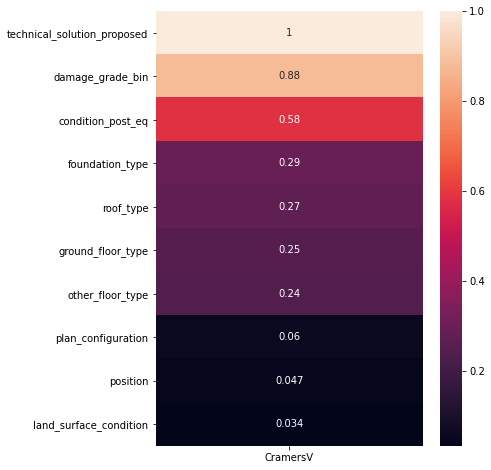

In [95]:
cramersEd = []

for i in catData:
    cramersEd.append(cramers_v(bui['technical_solution_proposed'],bui[i]))

plt.figure(figsize = (6,8))
sns.heatmap(pd.DataFrame({'CramersV' : cramersEd}, index = catData).sort_values(ascending = False, by = 'CramersV'), annot = True)
plt.show()

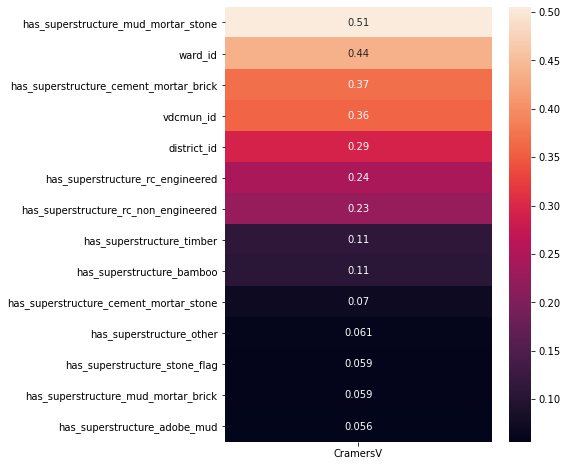

In [96]:
cramersEd = []

for i in numcatData:
    cramersEd.append(cramers_v(bui['technical_solution_proposed'],bui[i]))

plt.figure(figsize = (6,8))
sns.heatmap(pd.DataFrame({'CramersV' : cramersEd}, index = numcatData.columns).sort_values(ascending = False, by = 'CramersV'), annot = True)
plt.show()

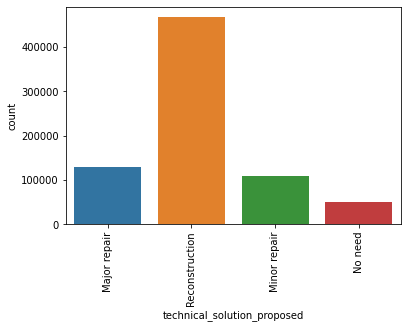

In [97]:
sns.countplot(bui['technical_solution_proposed'])
plt.xticks(rotation=90)
plt.show()

In [98]:
bui['technical_solution_proposed'].value_counts()

Reconstruction    467431
Major repair      128178
Minor repair      109512
No need            51155
Name: technical_solution_proposed, dtype: int64

- Kebanyakan bangunan di proposed untuk rekonstruksi ulang, hal ini memang dikarenakan banyak bangunan yang memiliki kerusakan di level high-risk

### Multivariate

#### condition_post_eq X damage_grade_bin

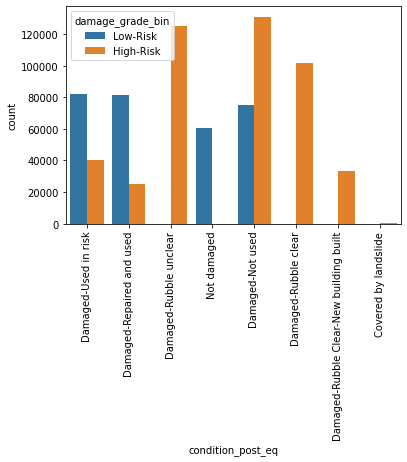

In [ ]:
sns.countplot(bui['condition_post_eq'], hue=bui['damage_grade_bin'])
plt.xticks(rotation=90)
plt.show()

In [106]:
round(pd.crosstab(index=bui['condition_post_eq'], columns=bui['damage_grade_bin'], normalize=True)*100,1)

damage_grade_bin,High-Risk,Low-Risk
condition_post_eq,,
Covered by landslide,0.1,0.0
Damaged-Not used,17.3,10.0
Damaged-Repaired and used,3.3,10.8
Damaged-Rubble Clear-New building built,4.4,0.0
Damaged-Rubble clear,13.5,0.0
Damaged-Rubble unclear,16.5,0.0
Damaged-Used in risk,5.4,10.9
Not damaged,0.0,8.0


Low-Risk:
  - Pasca gempa bangunan-bangunan yang mengalami kerusakan level low risk banyak yang masih digunakan tetapi beresiko karena belum diperbaiki. Ada juga yang sudah di perbaiki dan digunakan lagi. Ada yang tidak digunakan sama sekali dan ada juga yang tidak rusak.


High-Risk:
  - Pasca gempa bangunan-bangunan yang mengalami kerusakan level high-risk ada yang tertutup tanah longsor, tapi kebanyakan sudah tidak digunakan karena memang sudah tidak bisa digunakan. Banyak juga yang sisa puing nya belum dibersihkan, ada juga yang sudah dibersihkan sisa puingnya. Ada yang sudah dibangun baru, ada yang diperbaiki dan sudah digunakan lagi.

Rekomendasi:
- Sebaiknya bangunan yang mengalami kerusakan, baik itu low-risk atau high-risk jangan digunakan dahulu sebelum diperbaiki kecuali jika memang benar-benar tidak terjadi kerusakan. Karena bangunan tersebut sudah tidak sekuat sebelum gempa, ada bagian-bagian yang terpisah atau tidak menyatu, dan tentunya hal tersebut dapat membahayakan penghuni atau pengguna bangunan tersebut.

#### technical_solution_proposed X damage_grade_bin

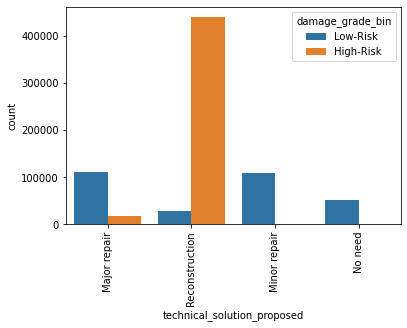

In [ ]:
sns.countplot(bui['technical_solution_proposed'], hue=bui['damage_grade_bin'])
plt.xticks(rotation=90)
plt.show()

In [108]:
round(pd.crosstab(index=bui['technical_solution_proposed'], columns=bui['damage_grade_bin'], normalize=True)*100,1)

damage_grade_bin,High-Risk,Low-Risk
technical_solution_proposed,,
Major repair,2.3,14.7
Minor repair,0.0,14.5
No need,0.0,6.8
Reconstruction,58.1,3.7


Low-Risk:
  - Bangunan yang memiliki kerusakan level low-risk kebanyakan hanya di proposed mendapatkan major dan minor repair saja bahkan ada yang tidak di mendapat technical solution karena memang bangunannya tidak mengalami kerusakan. Tetapi ada juga yang di proposed untuk mendapat rekonstruksi ulang meskipun jumlahnya hanya sedikit

High-Risk:
  - Bangunan yang memiliki kerusakan level high-risk paling banyak di proposed untuk rekonstruksi ulang. Ada juga yang mendapat major repair. Hal ini mengartikan bangunan mengalami kerusakan yang sangat parah sehingga harus dapat major repair bahkan rekonstruksi ulang. Tetapi ada juga bangunan yang sudah diperbaiki saat data ini dikumpulkan sehingga tidak perlu mendapat technical solution

In [ ]:
bui[(bui['damage_grade_bin'] == 'High-Risk') & (bui['technical_solution_proposed'] == 'No need')].head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,technical_solution_proposed,damage_grade_bin
55325,201804002021,20,2001,200102,2,2,15,240,20,20,Flat,Cement-Stone/Brick,Bamboo/Timber-Heavy roof,RC,TImber/Bamboo-Mud,Not attached,Rectangular,0,0,0,0,0,1,1,1,0,0,0,Damaged-Repaired and used,No need,High-Risk
79635,203001000501,20,2004,200407,1,1,15,250,9,9,Steep slope,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,1,0,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,No need,High-Risk
91723,203909002411,20,2004,200402,1,1,1,700,10,10,Flat,RC,RCC/RB/RBC,RC,Not applicable,Not attached,Rectangular,0,0,0,0,0,0,0,0,0,1,0,Damaged-Repaired and used,No need,High-Risk
97612,204406000901,20,2007,200706,2,2,15,384,20,20,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,No need,High-Risk
172316,220407010711,22,2202,220204,3,1,20,550,18,6,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Attached-1 side,Rectangular,0,1,0,0,0,0,1,0,0,0,0,Damaged-Repaired and used,No need,High-Risk


#### district_id X damage_grade

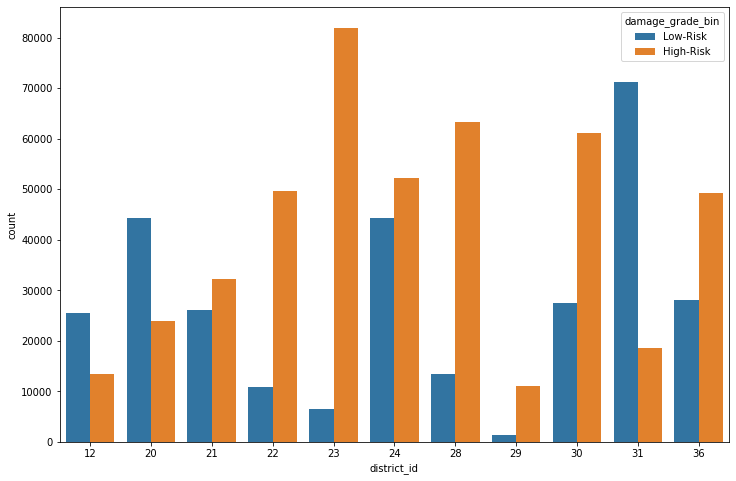

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(bui['district_id'], hue=bui['damage_grade_bin'])
plt.show()

In [ ]:
print('Distrik yang memiliki kerusakan high-risk lebih banyak dari kerusakan low-risk:')
print('distrik 21:', war[war['district_id'] == 21]['district_name'].unique())
print('distrik 22:', war[war['district_id'] == 22]['district_name'].unique())
print('distrik 23:', war[war['district_id'] == 23]['district_name'].unique())
print('distrik 24:', war[war['district_id'] == 24]['district_name'].unique())
print('distrik 28:', war[war['district_id'] == 28]['district_name'].unique())
print('distrik 29:', war[war['district_id'] == 29]['district_name'].unique())
print('distrik 30:', war[war['district_id'] == 30]['district_name'].unique())
print('distrik 36:', war[war['district_id'] == 36]['district_name'].unique())
print('==============================================')
print('Distrik yang memiliki kerusakan low-risk lebih banyak dari kerusakan high-risk:')
print('distrik 12:', war[war['district_id'] == 12]['district_name'].unique())
print('distrik 20:', war[war['district_id'] == 20]['district_name'].unique())
print('distrik 31:', war[war['district_id'] == 31]['district_name'].unique())

Distrik yang memiliki kerusakan high-risk lebih banyak dari kerusakan low-risk:
distrik 21: ['Ramechhap']
distrik 22: ['Dolakha']
distrik 23: ['Sindhupalchok']
distrik 24: ['Kavrepalanchok']
distrik 28: ['Nuwakot']
distrik 29: ['Rasuwa']
distrik 30: ['Dhading']
distrik 36: ['Gorkha']
Distrik yang memiliki kerusakan low-risk lebih banyak dari kerusakan high-risk:
distrik 12: ['Okhaldhunga']
distrik 20: ['Sindhuli']
distrik 31: ['Makwanpur']


In [ ]:
## Import district map
from google.colab import files
from IPython.display import Image

In [ ]:
district_map = files.upload()

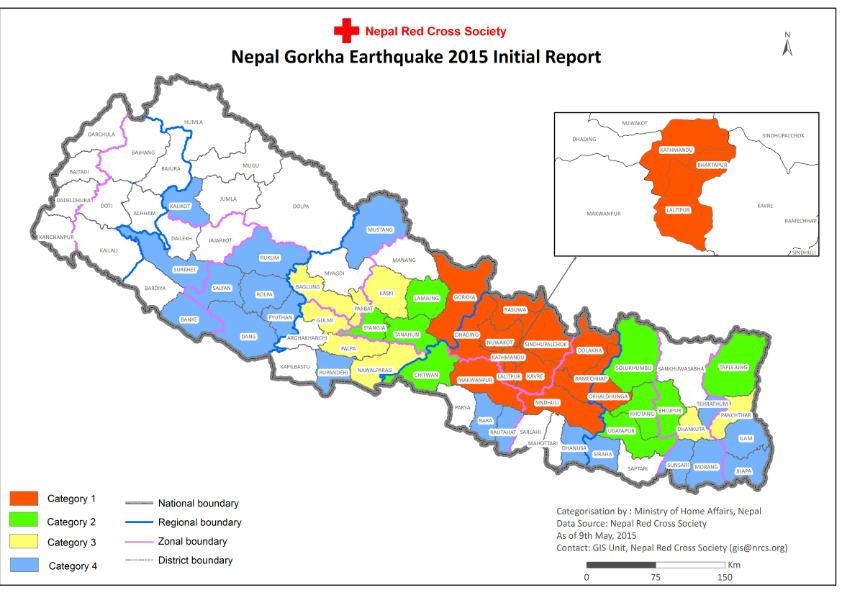

In [ ]:
Image('Nepal  Earthquake_2015.png')

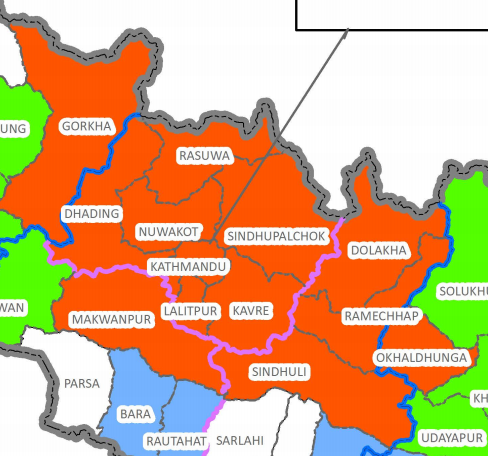

In [ ]:
Image('zoom-in-map.png')

Jarak dari pusat gempa (distrik Gorkha) ke distrik korban
  - Gorkha - Ramechhap: 283.4 km
  - Gorkha - Dolakha: 319.5 km
  - Gorkha - Sindhupalchok: 211.3 km
  - Gorkha - Kavrepalanchok: 218.8 km
  - Gorkha - Nuwakot: 124.2 km
  - Gorkha - Rasuwa: 204.64 km
  - Gorkha - Dhading: 31.54 km
  - =================================
  - Gorkha - Okhaldhunga: 356.1 km
  - Gorkha - Sindhuli: 273.4 km
  - Gorkha - Makwanpur: 170.6 km

In [109]:
round(pd.crosstab(index=bui['district_id'], columns=bui['foundation_type'], normalize=True)*100,1)

foundation_type,Bamboo/Timber,Cement-Stone/Brick,Mud mortar-Stone/Brick,Other,RC
district_id,,,,,
12,0.1,0.1,4.9,0.0,0.0
20,4.3,0.6,3.8,0.1,0.3
21,0.0,0.1,7.4,0.0,0.1
22,0.0,0.2,7.6,0.0,0.2
23,0.0,0.4,10.8,0.0,0.4
24,0.1,0.7,11.1,0.0,0.9
28,0.0,0.4,9.4,0.0,0.4
29,0.0,0.1,1.3,0.2,0.1
30,0.1,0.5,10.5,0.0,0.6


- Mengapa distrik 12, 20, 31 bisa memiliki jumlah kerusakan high-risk lebih sedikit dari distrik lain, saya mengambil beberapa poin dari crosstab di atas:
  - distrik 12 memiliki jarak paling jauh dengan pusat gempa dibanding distrik lain yang ada dalam data ini

  - distrik 20 juga memiliki jarak yang jauh dari pusat gempa dan mayoritas bangunan disana memiliki pondasi berjenis bamboo/timber

  - distrik 31 juga memiliki jarak cukup jauh dari pusat gempa dan bangunan disana banyak menggunakan pondasi selain jenis mud-mortar-stone/brick

#### land_surface_condition X damage_grade

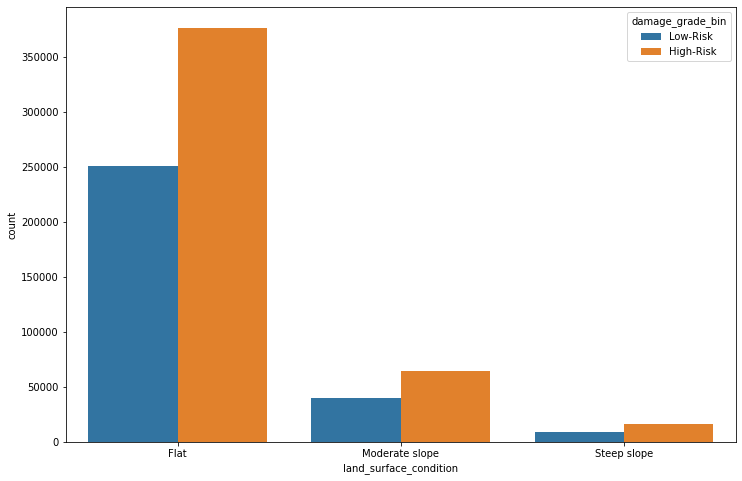

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(bui['land_surface_condition'], hue=bui['damage_grade_bin'])
plt.show()

In [113]:
land_flat = bui[bui['land_surface_condition'] == 'Flat']
land_mod_slop = bui[bui['land_surface_condition'] == 'Moderate slope']
land_step_slop = bui[bui['land_surface_condition'] == 'Steep slope']

In [114]:
round(pd.crosstab(index=land_flat['land_surface_condition'], columns=land_flat['damage_grade_bin'], normalize=True)*100,1)

damage_grade_bin,High-Risk,Low-Risk
land_surface_condition,,
Flat,60.0,40.0


In [115]:
round(pd.crosstab(index=land_mod_slop['land_surface_condition'], columns=land_mod_slop['damage_grade_bin'], normalize=True)*100,1)

damage_grade_bin,High-Risk,Low-Risk
land_surface_condition,,
Moderate slope,61.8,38.2


In [116]:
round(pd.crosstab(index=land_step_slop['land_surface_condition'], columns=land_step_slop['damage_grade_bin'], normalize=True)*100,1)

damage_grade_bin,High-Risk,Low-Risk
land_surface_condition,,
Steep slope,64.9,35.1


- Dari semua jenis permukaan tanah, jumlah kerusakan high-risk tetap lebih banyak dibanding low-risk

Rekomendasi:
  - Idealnya membangun rumah di atas tanah datar, tetapi jika memang harus membuat di tanah yang tidak datar ada beberapa hal yang harus diperhatikan menurut rumah.com[1](https://www.rumah.com/berita-properti/2017/11/164828/tips-bangun-rumah-di-lahan-miring):

    1. Perhatikan kualitas tanah
    
      Kualitas tanah penting diperhatikan jika ingin membangun tempat tinggal di lahan miring. Tanah miring umumnya bertekstur lembek dan tidak stabil. Untuk membangun hunian idealnya harus memilih tekstur tanah yang padat dan liat agar bangunan dapat berdiri kokoh.

    2. Tentukan tingkat kemiringan

      Perhatikan tingkat kemiringan lahan. Tentukan kemana arah kemiringan lahan akan Anda buat, samping, depan, belakang atau hoek. Perhatikan ketinggian dari kemiringan lahan, posisi jalan dan bangunan di sekitar lahan. Setelah menentukan kemiringan barulah Anda dapat membuat desain rumah.

      Akan lebih baik jika Anda mendapat lahan dengan konstruksi bagian depan yang lebih rendah dibanding bagian belakang karena dapat menciptakan konstruksi rumah yang lebih kokoh dan lebih aman.

    3. Buat desain bertingkat

      Membangun rumah pada lahan miring mengharuskan Anda memiliki rancangan desain yang tepat. Kebanyakan ahli desain menyarankan agar rumah pada lahan miring dibuat bertingkat. Membuat rumah bertingkat pada lahan miring dapat menghemat biaya pengurukan.

      Bila sudut kemiringan tidak besar, perbedaan tinggi permukaan setiap ruang dapat dihubungkan menggunakan tangga landai. Kontur naik turun ataupun tinggi rendahnya ruangan yang telah dibuat dapat memberikan nilai seni tersendiri.

      Rumah dua lantai pada lahan miring sekaligus dapat memanipulasi model rumah. Anda tak perlu mengubah bagian permukaan lahan secara signifikan. Tampilan depan rumah pun akan lebih unik dan berestetika.

    4. Pondasi yang kuat

      pondasi rumah pada lahan miring harus menjadi perhatian utama saat pembangunan. pondasi harus dibuat sekuat mungkin. Untuk hasil maksimal disarankan menggunakan jasa kontraktor profesional dan tukang bangunan berpengalaman.

      Perhatikan juga kedalaman pondasi. Sangat disarankan untuk menggunakan pondasi tiang pancang guna menopang bangunan yang kokoh dan kuat. Jika pondasi sudah ada, Anda dapat mulai membangun rumah seperti biasa.

#### foundation_type X damage_grade

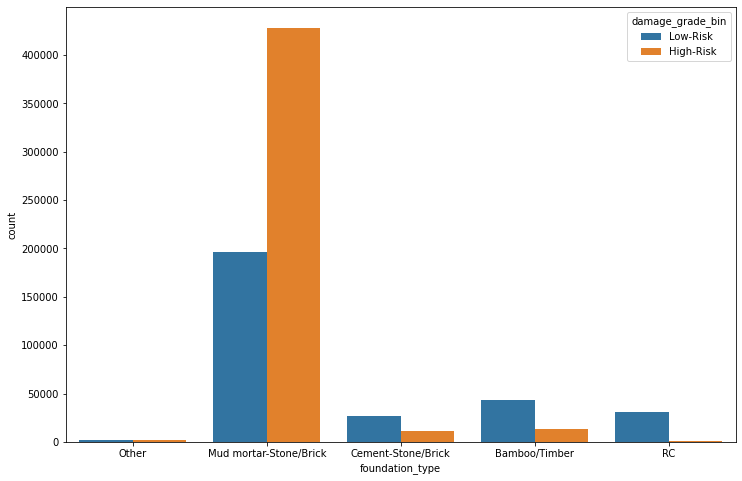

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(bui['foundation_type'], hue=bui['damage_grade_bin'])
plt.show()

In [117]:
fon_mud = bui[bui['foundation_type'] == 'Mud mortar-Stone/Brick']
fon_cem = bui[bui['foundation_type'] == 'Cement-Stone/Brick']
fon_bam = bui[bui['foundation_type'] == 'Bamboo/Timber']
fon_rc = bui[bui['foundation_type'] == 'RC']

In [118]:
round(pd.crosstab(index=fon_mud['foundation_type'], columns=fon_mud['damage_grade_bin'], normalize=True)*100,1)

damage_grade_bin,High-Risk,Low-Risk
foundation_type,,
Mud mortar-Stone/Brick,68.6,31.4


In [119]:
round(pd.crosstab(index=fon_cem['foundation_type'], columns=fon_cem['damage_grade_bin'], normalize=True)*100,1)

damage_grade_bin,High-Risk,Low-Risk
foundation_type,,
Cement-Stone/Brick,29.9,70.1


In [120]:
round(pd.crosstab(index=fon_bam['foundation_type'], columns=fon_bam['damage_grade_bin'], normalize=True)*100,1)

damage_grade_bin,High-Risk,Low-Risk
foundation_type,,
Bamboo/Timber,23.8,76.2


In [121]:
round(pd.crosstab(index=fon_rc['foundation_type'], columns=fon_rc['damage_grade_bin'], normalize=True)*100,1)

damage_grade_bin,High-Risk,Low-Risk
foundation_type,,
RC,3.9,96.1


- Dari semua jenis pondasi, yang paling banyak mengalami kerusakan high-risk adalah pondasi jenis mud mortar-stone/brick

- yang membuat saya agak kaget adalah adanya pondasi bambu dan dari data ini ternyata pondasi bambu lebih sedikit yang mengalami kerusakan high-risk. Namun setelah membaca beberapa artikel akhirnya saya memahami mengapa bangunan dengan pondasi bambu dalam data ini lebih banyak mengalami kerusakan low-risk. Ternyata bambu adalah salah satu bahan bangunan tertua dan sangat serbaguna dengan banyak aplikasi di bidang konstruksi bangunan[1](https://ejournal.undip.ac.id/index.php/metana/article/viewFile/5117/4640). Dari berbagai penelitian, struktur bambu terbukti memiliki banyak keunggulan. Seratnya yang liat dan elastis sangat baik dalam menahan beban (baik beban tekan/tarik, geser, maupun tekuk). Fakultas Kehutanan IPB mengungkapkan fakta bahwa kuat tekan bambu (yang berkualitas) sama dengan kayu, bahkan kuat tariknya lebih baik daripada kayu. Bahkan dengan kekuatan seperti ini, jenis bambu tertentu bisa menggantikan baja sebagai tulangan beton[1](https://nasional.kompas.com/read/2008/03/01/05194257/struktur.bambu.kuat.nggak.sih).

- Pondasi jenis cement-stone/brick sudah jelas lebih kuat dari mud-mortar-stone/brick, perbedaannya terletak pada penggunaan cement yang lebih kuat dalam merekatkan material.

- Pondasi jenis RC (reinforced concrete) atau RCC (reinforced cement concrete) atau yang lebih dikenal dengan beton bertulang dalam bahasa Indonesia. Merupakan material yang umum digunakaan untuk pondasi saat ini karena dinilai sangat kuat, tetapi penggunaan RC memakan biaya yang cukup besar

- Terlepas dari apapun jenis pondasinya sebenarnya tidak ada pakem dalam menentukan pondasi karena ada faktor-faktor lain yang berpengaruh terhadap penggunaan jenis pondasi tertentu seperti dilansir dari Arafuru.com, untuk menentukan jenis pondasi yang paling tepat untuk rumah Anda, perlu diperhatikan beberapa aspek, seperti desain rumah, jenis tanah, kondisi geografis, dan sebagainya[1](https://www.rumah.com/panduan-properti/mengenal-jenis-pondasi-bangunan-yang-paling-bagus-dan-kuat-untuk-rumah-29095).

Rekomendasi:
  - Jika memiliki budget yang besar, maka gunakan pondasi jenis RC, namun jika tidak memiliki budget yang besar maka bambu dan cement-brick/stone bisa menjadi alternatif

#### roof_type X damage_grade

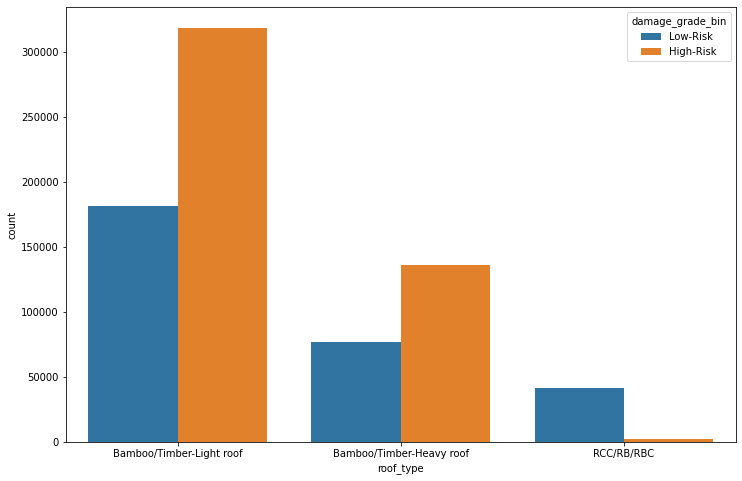

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(bui['roof_type'], hue=bui['damage_grade_bin'])
plt.show()

In [122]:
rof_lig = bui[bui['roof_type'] == 'Bamboo/Timber-Light roof']
rof_hea = bui[bui['roof_type'] == 'Bamboo/Timber-Heavy roof']
rof_rc = bui[bui['roof_type'] == 'RCC/RB/RBC']

In [123]:
round(pd.crosstab(index=rof_lig['roof_type'], columns=rof_lig['damage_grade_bin'], normalize=True)*100,1)

damage_grade_bin,High-Risk,Low-Risk
roof_type,,
Bamboo/Timber-Light roof,63.7,36.3


In [124]:
round(pd.crosstab(index=rof_hea['roof_type'], columns=rof_hea['damage_grade_bin'], normalize=True)*100,1)

damage_grade_bin,High-Risk,Low-Risk
roof_type,,
Bamboo/Timber-Heavy roof,64.0,36.0


In [125]:
round(pd.crosstab(index=rof_rc['roof_type'], columns=rof_rc['damage_grade_bin'], normalize=True)*100,1)

damage_grade_bin,High-Risk,Low-Risk
roof_type,,
RCC/RB/RBC,5.9,94.1


- Dari 3 roof type yang paling banyak low-risk nya adalah RCC/RB/RBC. RCC: Reinforced Cement Concrete; RB: Reinforced Brick; RBC: Reinforced Brick Concrete

- Namun, nepal masih di dominasi oleh bangunan tradisional, sehingga atap dari bambu atau kayu masih banyak digunakan. Dan kita dapat melihat dari data ini bangunan yang menggunakan atap dari bambu atau kayu lebih banyak yang mengalami kerusakan level high-risk, selisihnya lumayan jauh dengan yang low-risk.

Rekomendasi:
  - Jika ingin menggunakan atap jenis kayu/bambu pastikan diaplikasikan dengan baik dan benar ditambah dengan penggunaan pondasi dan superstruktur yang kuat karena nantinya atap akan bertumpu di atas superstruktur. Kemudian bambu atau kayu juga perlu maintenance rutin karena kayu/bambu tidak terlalu awet terhadap berbagai cuaca, namun harganya jauh lebih terjangkau dibandingkan RCC/RB/RBC

#### position X damage_grade

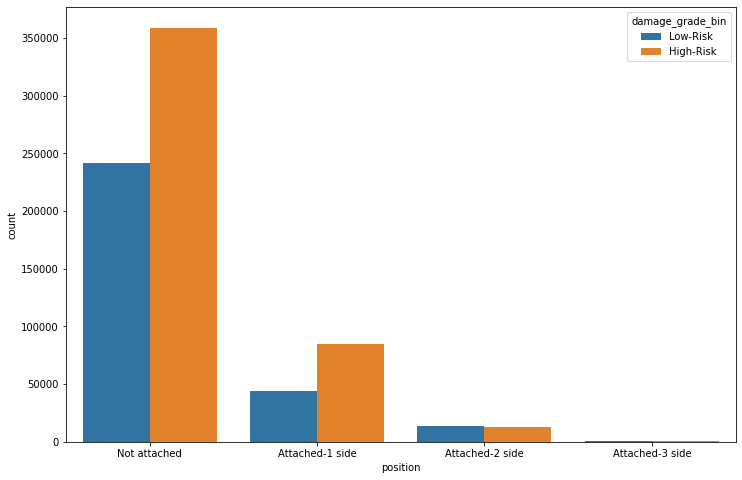

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(bui['position'], hue=bui['damage_grade_bin'])
plt.show()

In [ ]:
pd.crosstab(index=bui['position'], columns=bui['damage_grade_bin'])

damage_grade_bin,High-Risk,Low-Risk
position,,
Attached-1 side,84611,43808
Attached-2 side,13044,13576
Attached-3 side,490,810
Not attached,358821,241116


In [126]:
pos_not = bui[bui['position'] == 'Not attached']
pos_1 = bui[bui['position'] == 'Attached-1 side']
pos_2 = bui[bui['position'] == 'Attached-2 side']
pos_3 = bui[bui['position'] == 'Attached-3 side']

In [127]:
round(pd.crosstab(index=pos_not['position'], columns=pos_not['damage_grade_bin'], normalize=True)*100,1)

damage_grade_bin,High-Risk,Low-Risk
position,,
Not attached,59.8,40.2


In [128]:
round(pd.crosstab(index=pos_1['position'], columns=pos_1['damage_grade_bin'], normalize=True)*100,1)

damage_grade_bin,High-Risk,Low-Risk
position,,
Attached-1 side,65.9,34.1


In [129]:
round(pd.crosstab(index=pos_2['position'], columns=pos_2['damage_grade_bin'], normalize=True)*100,1)

damage_grade_bin,High-Risk,Low-Risk
position,,
Attached-2 side,49.0,51.0


In [130]:
round(pd.crosstab(index=pos_3['position'], columns=pos_3['damage_grade_bin'], normalize=True)*100,1)

damage_grade_bin,High-Risk,Low-Risk
position,,
Attached-3 side,37.7,62.3


- Dari crosstab kita dapat melihat bangunan yang menempel dengan bangunan lain di 3 sisinya (kiri, kanan, belakang) atau attached-3 side memiliki level kerusakan low-risk lebih banyak dibandingkan dengan level high-risk. Sebaliknya, bangunan yang berdiri sendiri (not attached position) dan bangunan yang menempel hanya dengan 1 bangunan (attached-1 side position) memiliki level kerusakan high-risk yang lebih banyak. Sedangkan untuk bangunan yang menempel dengan 2 bangunan lain (attached-2 side) memiliki jumlah yang hampir seimbang antara level kerusakan high-risk dan low-risk, meskipun low-risk lebih unggul sedikit.

Rekomendasi:
  - Membuat antar bangunan saling menempel sehingga menjadi lebih kuat terhadap goncangan apalagi jika pondasi, superstruktur dan atap menggunakan jenis yang tidak rentan terhadap gempa

  - Jika mau membuat bangunan yang standalone bisa memilih pondasi dan superstruktur yang tidak rentan terhaap gempa

#### ground_floor_type X damage_grade

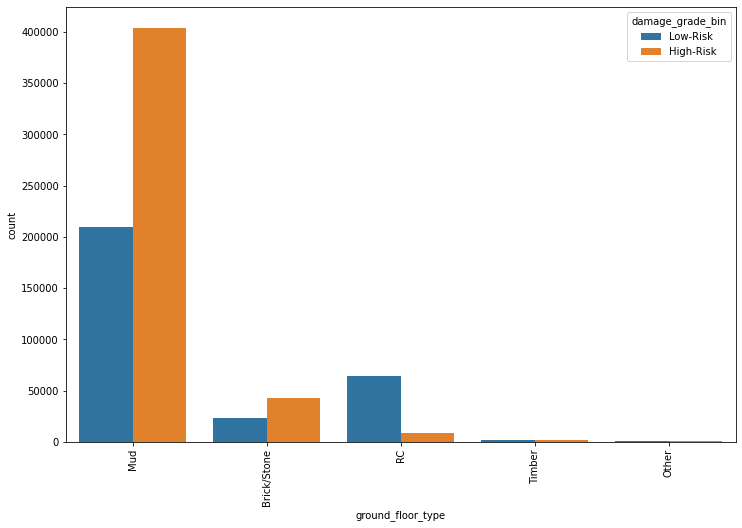

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(bui['ground_floor_type'], hue=bui['damage_grade_bin'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
pd.crosstab(index=bui['ground_floor_type'], columns=bui['damage_grade_bin']).sort_values('High-Risk', ascending=False)

damage_grade_bin,High-Risk,Low-Risk
ground_floor_type,,
Mud,404183,209429
Brick/Stone,42494,23282
RC,8271,64002
Timber,1697,1870
Other,321,727


- Bangunan dengan jenis ground floor mud dan brick/stone lebih banyak mengalami kerusakan level high-risk. Sebaliknya bangunan dengan ground floor jenis RC (reinforced concrete) dan Timber lebih sedikit mengalami kerusakan level high-risk.

Rekomendasi:
  - Menggunakan ground floor jenis RC agar meningkatkan kekuatan bangunan sehingga tidak retan terhadap gempa. Tetapi jika tidak memiliki budget yang besar bisa menggunakan timber sebagai alternatif

In [131]:
gf_mud = bui[bui['ground_floor_type'] == 'Mud']
gf_bri = bui[bui['ground_floor_type'] == 'Brick/Stone']
gf_rc = bui[bui['ground_floor_type'] == 'RC']
gf_tim = bui[bui['ground_floor_type'] == 'Timber']

In [134]:
round(pd.crosstab(index=gf_mud['ground_floor_type'], columns=gf_mud['damage_grade_bin'], normalize=True)*100,1)

damage_grade_bin,High-Risk,Low-Risk
ground_floor_type,,
Mud,65.9,34.1


In [135]:
round(pd.crosstab(index=gf_bri['ground_floor_type'], columns=gf_bri['damage_grade_bin'], normalize=True)*100,1)

damage_grade_bin,High-Risk,Low-Risk
ground_floor_type,,
Brick/Stone,64.6,35.4


In [136]:
round(pd.crosstab(index=gf_rc['ground_floor_type'], columns=gf_rc['damage_grade_bin'], normalize=True)*100,1)

damage_grade_bin,High-Risk,Low-Risk
ground_floor_type,,
RC,11.4,88.6


In [137]:
round(pd.crosstab(index=gf_tim['ground_floor_type'], columns=gf_tim['damage_grade_bin'], normalize=True)*100,1)

damage_grade_bin,High-Risk,Low-Risk
ground_floor_type,,
Timber,47.6,52.4


#### superstructures X damage_grade_bin

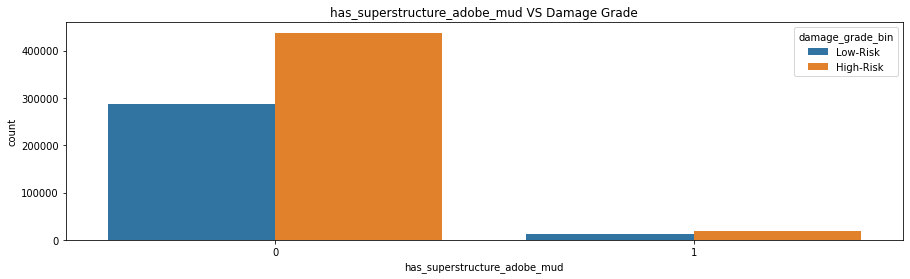

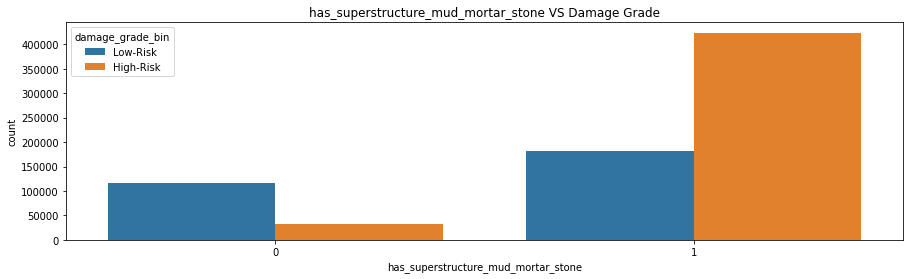

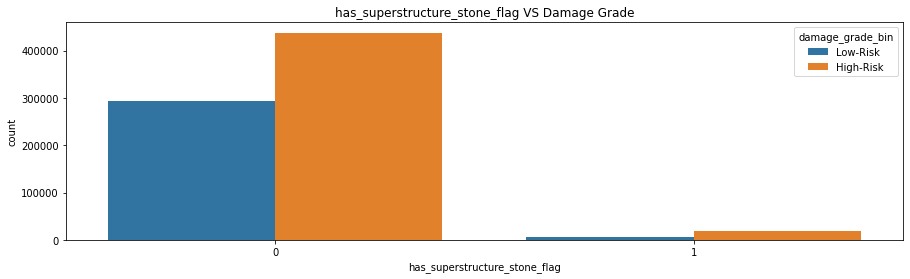

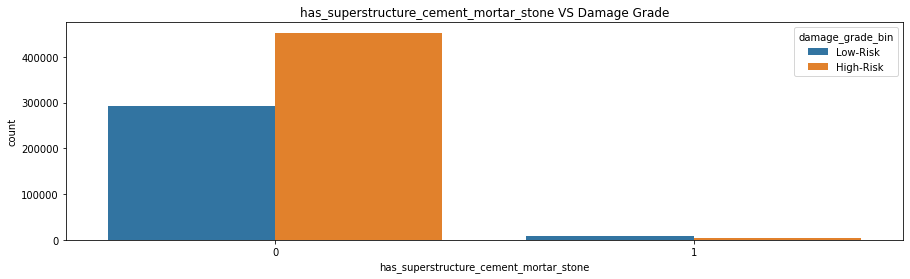

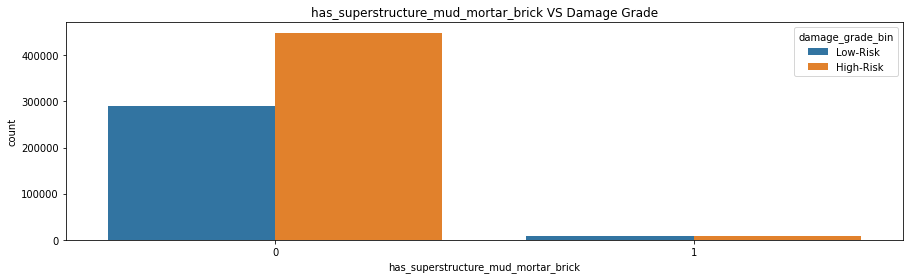

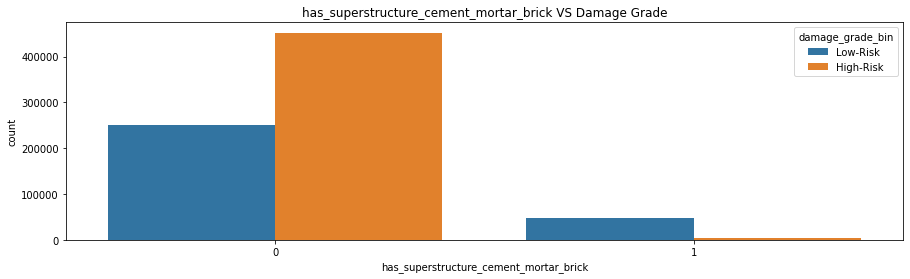

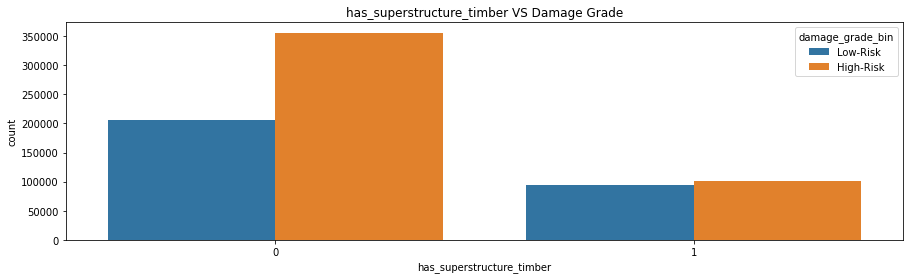

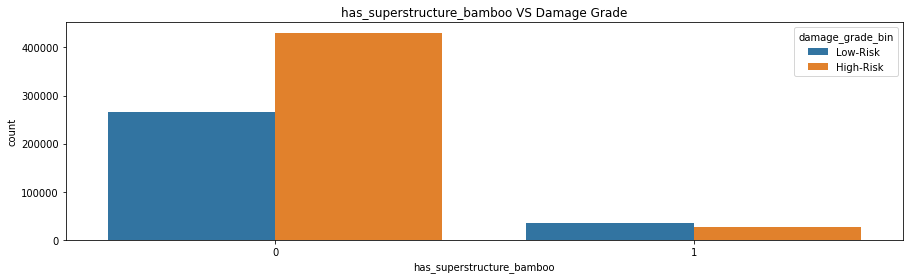

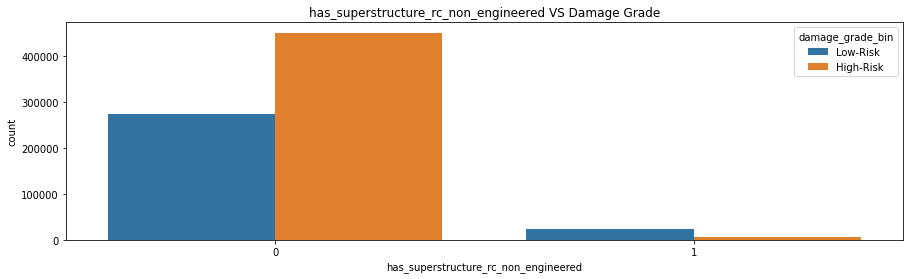

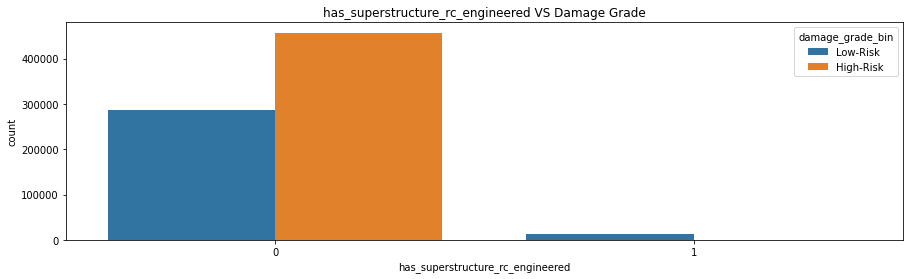

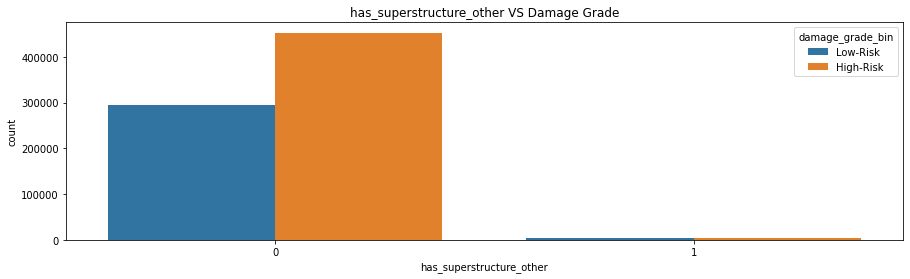

In [ ]:
cols = ['has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 
        'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 
        'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 
        'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other'
       ]

for c in cols:
    plt.figure(figsize=(15,4))
    ax = sns.countplot(x = bui[c], hue=bui.damage_grade_bin)
    plt.title(f"{c} VS Damage Grade") 
    plt.show()

- Bangunan dengan superstruktur jenis adobe_mud, mud mortar-stone, stone_flag, mud_mortar_brick, dan timber banyak mengalami kerusakan level high-risk

- Bangunan dengan superstruktur jenis cement_mortar_stone, cement_mortar_brick, bamboo, dan RC banyak mengalami kerusakan level low-risk 

In [139]:
sup_ado = bui[bui['has_superstructure_adobe_mud'] == 1]
sup_mud_sto = bui[bui['has_superstructure_mud_mortar_stone'] == 1]
sup_sto = bui[bui['has_superstructure_stone_flag'] == 1]
sup_mud_bri = bui[bui['has_superstructure_mud_mortar_brick'] == 1]
sup_tim = bui[bui['has_superstructure_timber'] == 1]
sup_cem_sto = bui[bui['has_superstructure_cement_mortar_stone'] == 1]
sup_cem_bri = bui[bui['has_superstructure_cement_mortar_brick'] == 1]
sup_bam = bui[bui['has_superstructure_bamboo'] == 1]
sup_rc_non = bui[bui['has_superstructure_rc_non_engineered'] == 1]
sup_rc = bui[bui['has_superstructure_rc_engineered'] == 1]

In [140]:
round(pd.crosstab(index=sup_ado['has_superstructure_adobe_mud'], columns=sup_ado['damage_grade_bin'], normalize=True)*100,1)

damage_grade_bin,High-Risk,Low-Risk
has_superstructure_adobe_mud,,
1,59.8,40.2


In [141]:
round(pd.crosstab(index=sup_mud_sto['has_superstructure_mud_mortar_stone'], columns=sup_mud_sto['damage_grade_bin'], normalize=True)*100,1)

damage_grade_bin,High-Risk,Low-Risk
has_superstructure_mud_mortar_stone,,
1,69.9,30.1


In [142]:
round(pd.crosstab(index=sup_sto['has_superstructure_stone_flag'], columns=sup_sto['damage_grade_bin'], normalize=True)*100,1)

damage_grade_bin,High-Risk,Low-Risk
has_superstructure_stone_flag,,
1,73.9,26.1


In [143]:
round(pd.crosstab(index=sup_mud_bri['has_superstructure_mud_mortar_brick'], columns=sup_mud_bri['damage_grade_bin'], normalize=True)*100,1)

damage_grade_bin,High-Risk,Low-Risk
has_superstructure_mud_mortar_brick,,
1,49.0,51.0


In [144]:
round(pd.crosstab(index=sup_tim['has_superstructure_timber'], columns=sup_tim['damage_grade_bin'], normalize=True)*100,1)

damage_grade_bin,High-Risk,Low-Risk
has_superstructure_timber,,
1,51.9,48.1


In [145]:
round(pd.crosstab(index=sup_cem_sto['has_superstructure_cement_mortar_stone'], columns=sup_cem_sto['damage_grade_bin'], normalize=True)*100,1)

damage_grade_bin,High-Risk,Low-Risk
has_superstructure_cement_mortar_stone,,
1,37.4,62.6


In [146]:
round(pd.crosstab(index=sup_cem_bri['has_superstructure_cement_mortar_brick'], columns=sup_cem_bri['damage_grade_bin'], normalize=True)*100,1)

damage_grade_bin,High-Risk,Low-Risk
has_superstructure_cement_mortar_brick,,
1,9.6,90.4


In [147]:
round(pd.crosstab(index=sup_bam['has_superstructure_bamboo'], columns=sup_bam['damage_grade_bin'], normalize=True)*100,1)

damage_grade_bin,High-Risk,Low-Risk
has_superstructure_bamboo,,
1,43.4,56.6


In [148]:
round(pd.crosstab(index=sup_rc_non['has_superstructure_rc_non_engineered'], columns=sup_rc_non['damage_grade_bin'], normalize=True)*100,1)

damage_grade_bin,High-Risk,Low-Risk
has_superstructure_rc_non_engineered,,
1,19.8,80.2


In [149]:
round(pd.crosstab(index=sup_rc['has_superstructure_rc_engineered'], columns=sup_rc['damage_grade_bin'], normalize=True)*100,1)

damage_grade_bin,High-Risk,Low-Risk
has_superstructure_rc_engineered,,
1,2.1,97.9


Rekomendasi:  
  - Jika memiliki budget yang besar bisa menggunakan superstruktur jenis RC, tetapi jika budget nya tidak besar maka cement-mortar-stone, mud_mortar_brick, dan bamboo bisa menjadi alternatif jenis superstruktur

#### age_building X damage_grade_bin

In [ ]:
bui['age_building'].describe()

## saya akan binning feature age agar memudahkan dalam analisa multivariate

count    756276.000000
mean         20.298920
std          17.186377
min           0.000000
25%           9.000000
50%          16.000000
75%          26.000000
max         200.000000
Name: age_building, dtype: float64

In [150]:
bui['age_bin'] = pd.cut(bui['age_building'], bins=[-1,9,16,26,200], labels=['0-9', '10-16', '17-26', '27-200'])

In [ ]:
bui['age_bin'].value_counts()

0-9       203253
27-200    187509
10-16     186790
17-26     178724
Name: age_bin, dtype: int64

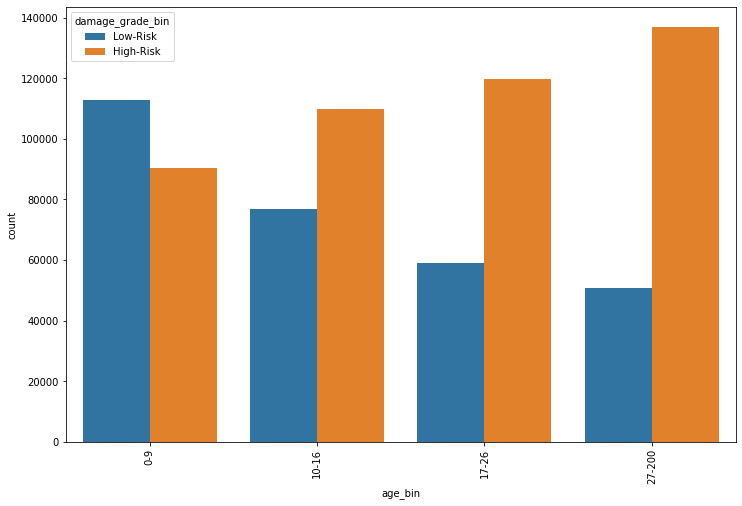

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(bui['age_bin'], hue=bui['damage_grade_bin'])
plt.xticks(rotation=90)
plt.show()

In [151]:
age_0 = bui[bui['age_bin'] == '0-9']
age_10 = bui[bui['age_bin'] == '10-16']
age_17 = bui[bui['age_bin'] == '17-26']
age_27 = bui[bui['age_bin'] == '27-200']

In [152]:
round(pd.crosstab(index=age_0['age_bin'], columns=age_0['damage_grade_bin'], normalize=True)*100,1)

damage_grade_bin,High-Risk,Low-Risk
age_bin,,
0-9,44.5,55.5


In [153]:
round(pd.crosstab(index=age_10['age_bin'], columns=age_10['damage_grade_bin'], normalize=True)*100,1)

damage_grade_bin,High-Risk,Low-Risk
age_bin,,
10-16,58.8,41.2


In [154]:
round(pd.crosstab(index=age_17['age_bin'], columns=age_17['damage_grade_bin'], normalize=True)*100,1)

damage_grade_bin,High-Risk,Low-Risk
age_bin,,
17-26,67.0,33.0


In [155]:
round(pd.crosstab(index=age_27['age_bin'], columns=age_27['damage_grade_bin'], normalize=True)*100,1)

damage_grade_bin,High-Risk,Low-Risk
age_bin,,
27-200,73.0,27.0


- Langsung terlihat, bangunan dengan kategori usia 0-9 memiliki level kerusakan low-risk yang lebih tinggi, sedangkan kategori usia 10-16, 17-26, 27-200 tahun memiliki kerusakan high-risk yang lebih tinggi.

Rekomendasi:
  - Merenovasi bangunan seminimalnya saat sudah berusia di atas 9 tahun. Apalagi jika bangunan menggunakan material yang bisa rusak termakan usia dan cuaca seperti kayu, bambu, batu dan lumpur

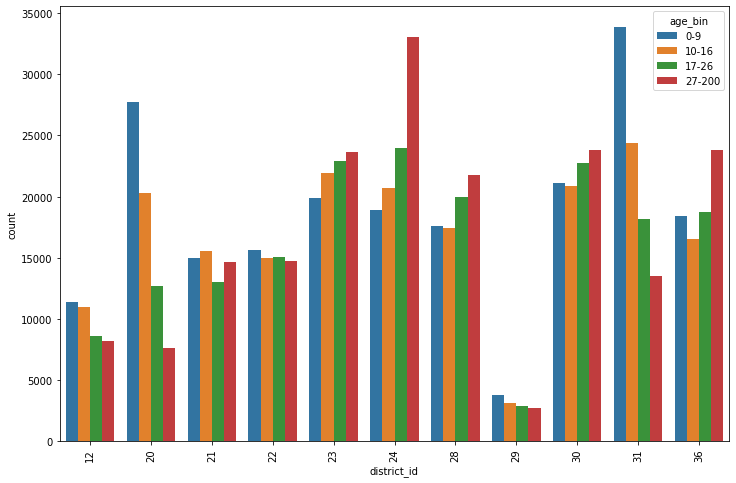

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(bui['district_id'], hue=bui['age_bin'])
plt.xticks(rotation=90)
plt.show()

- distrik 12, 20, 22, 29, 31 paling banyak bangunan berusia 0-9
  - Bersambung dengan analisis district id X damage_grade, ternyata selain jarak dan jenis pondasi, district 12, 20, 31 juga memiliki banyak bangunan berusia 0-9 tahun

- distrik 21 paling banyak bangunan berusia 10-16

- distrik 23, 24, 28, 30, 36 paling banyak bangunan berusia 27-200

- next, saya ingin melihat spesifikasi bangunan seperti pondasi, jenis ground floor, dan superstruktur berdasarkan kelompok usia bangunan

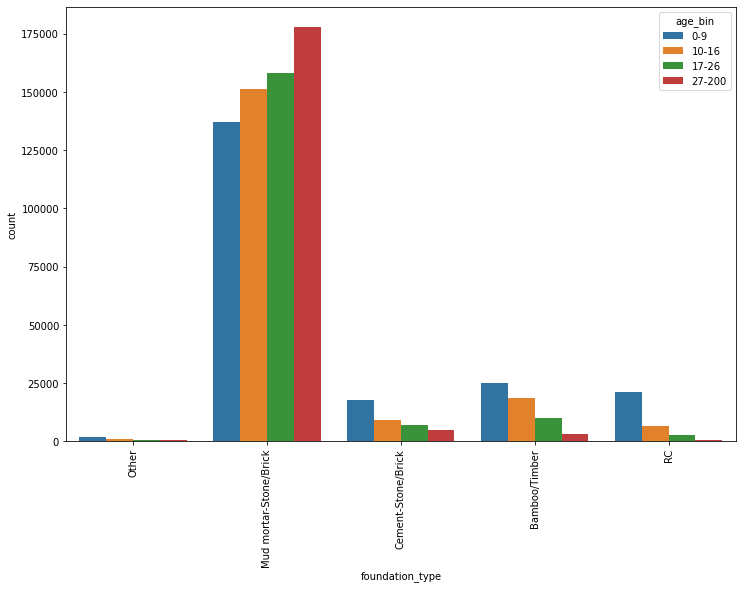

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(bui['foundation_type'], hue=bui['age_bin'])
plt.xticks(rotation=90)
plt.show()

- pondasi berjenis beton bertulang(RC), bamboo/timber, cement-stone/brick paling banyak digunakan bangunan berusia 0-9 tahun

- seperti diketahui, dalam data ini pondasi jenis mud mortar-stone/brick adalah pondasi yang paling banyak digunakan, saat dipecah berdasarkan kelompok-kelompok usia, kelompok usia 27-200 tahun lah yang paling banyak menggunakan pondasi jenis ini.

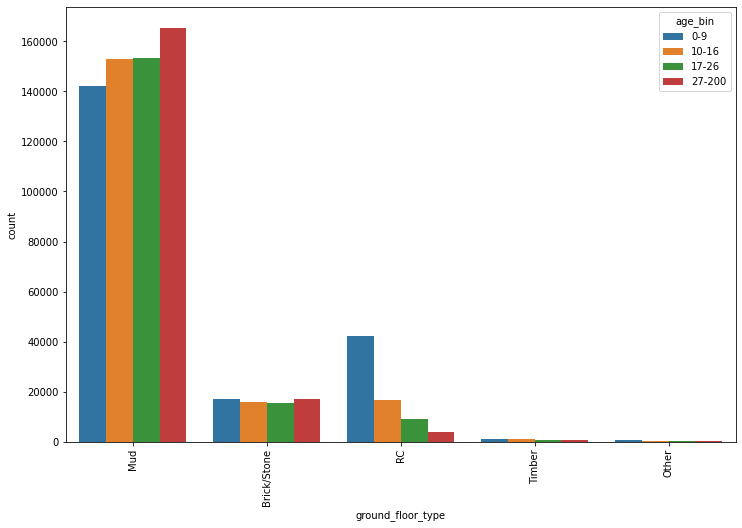

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(bui['ground_floor_type'], hue=bui['age_bin'])
plt.xticks(rotation=90)
plt.show()

In [156]:
round(pd.crosstab(index=bui['ground_floor_type'], columns=bui['age_bin'], normalize=True)*100,1)

age_bin,0-9,10-16,17-26,27-200
ground_floor_type,,,,
Brick/Stone,2.3,2.1,2.1,2.3
Mud,18.8,20.2,20.3,21.9
Other,0.1,0.0,0.0,0.0
RC,5.6,2.2,1.2,0.5
Timber,0.2,0.2,0.1,0.1


- ground floor jenis Brick/Stone paling banyak digunakan oleh bangunan berusia 27-200 tahun

- ground floor jenis Mud paling banyak digunakan oleh bangunan berusia 27-200 tahun

- ground floor jenis RC paling banyak digunakan oleh bangunan berusia 0-9 tahun

- ground floor jenis Timber paling banyak digunakan oleh bangunan berusia 0-9 tahun

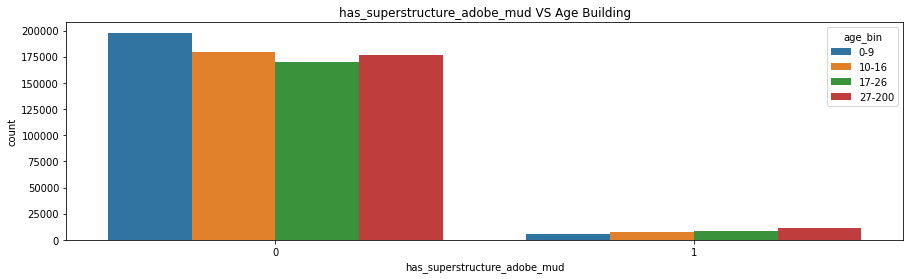

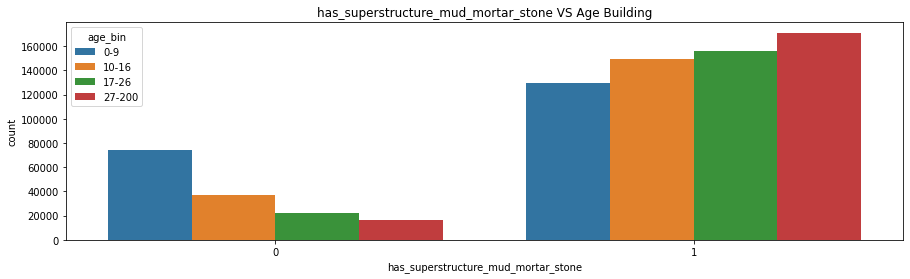

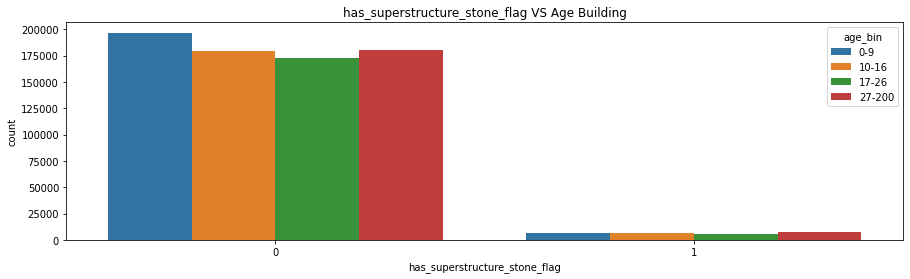

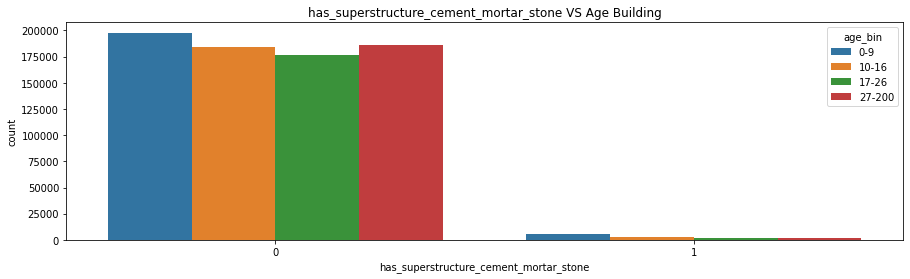

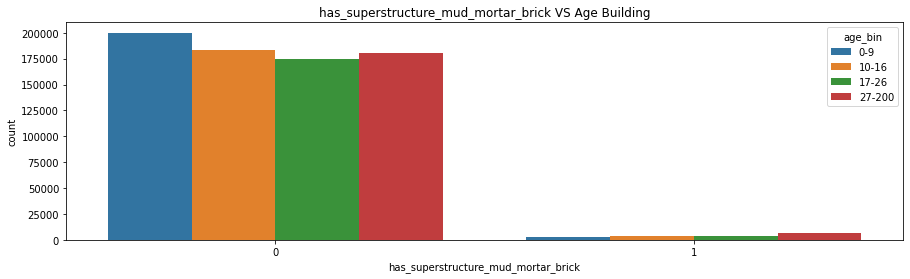

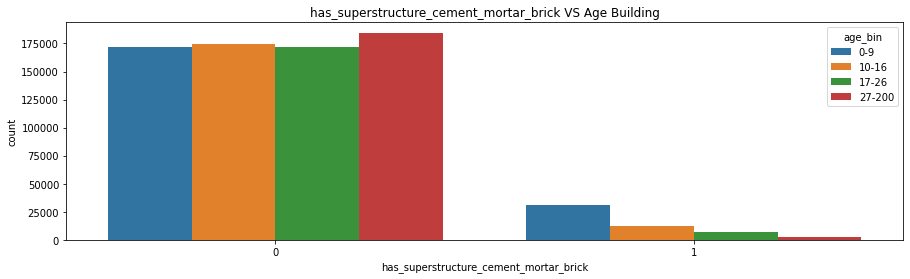

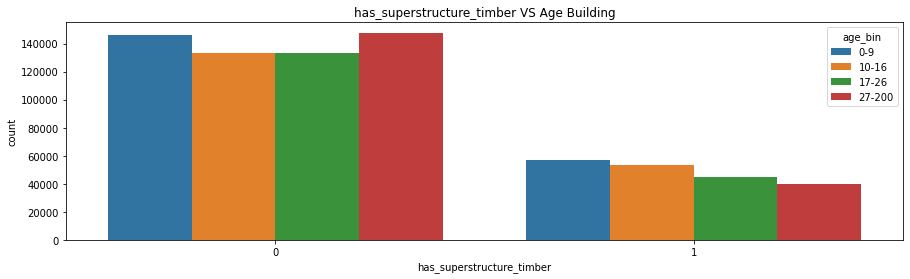

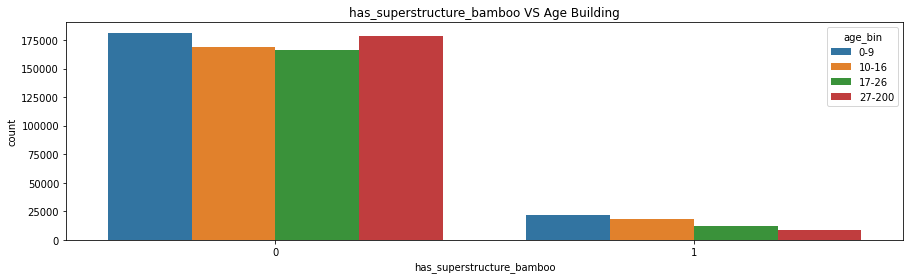

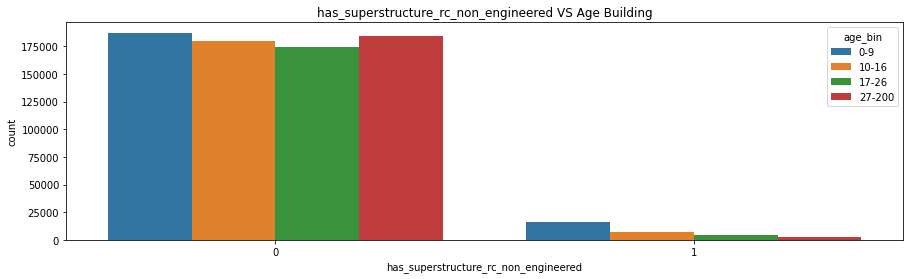

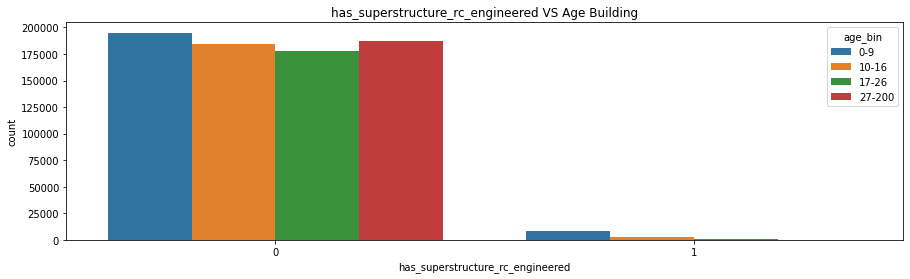

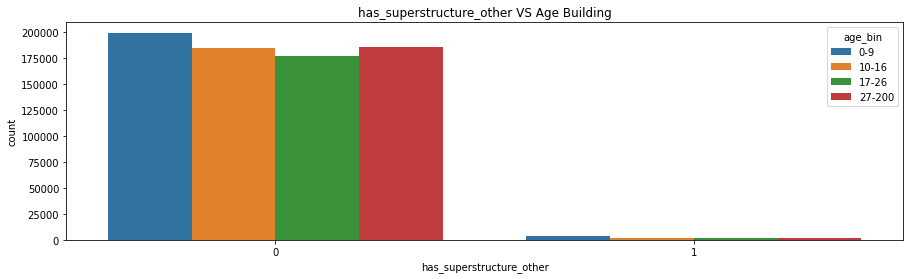

In [ ]:
cols = ['has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 
        'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 
        'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 
        'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other'
       ]

for c in cols:
    plt.figure(figsize=(15,4))
    ax = sns.countplot(x = bui[c], hue=bui.age_bin)
    plt.title(f"{c} VS Age Building") 
    plt.show()

- superstruktur jenis adobe_mud paling banyak digunakan oleh bangunan berusia 27-200 tahun

- superstruktur jenis mud_mortar_stone paling banyak digunakan oleh bangunan berusia 27-200 tahun

- superstruktur jenis stone_flag paling banyak digunakan oleh bangunan berusia 27-200 tahun

- superstruktur jenis cement_mortar_stone paling banyak digunakan oleh bangunan berusia 0-9 tahun

- superstruktur jenis mud_mortar_brick paling banyak digunakan oleh bangunan berusia 27-200 tahun

- superstruktur jenis cement_mortar_brick paling banyak digunakan oleh bangunan berusia 0-9 tahun

- superstruktur jenis timber paling banyak digunakan oleh bangunan berusia 0-9 tahun

- superstruktur jenis bamboo paling banyak digunakan oleh bangunan berusia 0-9 tahun

- superstruktur jenis RC paling banyak digunakan oleh bangunan berusia 0-9 tahun

#### height_ft X damage_grade_bin

In [ ]:
bui['height_ft_pre_eq'].describe()

## saya akan binning feature age agar memudahkan dalam analisa multivariate

count    756276.000000
mean         16.051233
std           5.494539
min           6.000000
25%          12.000000
50%          16.000000
75%          18.000000
max          99.000000
Name: height_ft_pre_eq, dtype: float64

In [ ]:
bui['height_bin'] = pd.cut(bui['height_ft_pre_eq'], bins=[5,12,16,18,99], labels=['6-12', '13-16', '17-18', '19-99'])

In [ ]:
bui['height_bin'].value_counts()

13-16    252813
6-12     191658
19-99    181678
17-18    130127
Name: height_bin, dtype: int64

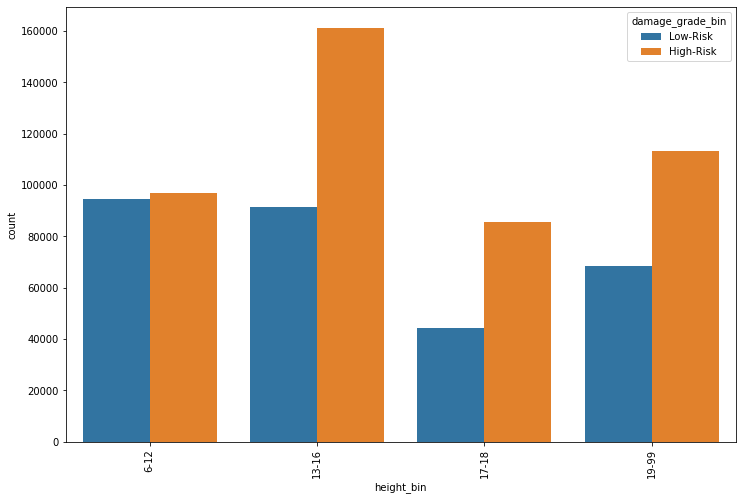

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(bui['height_bin'], hue=bui['damage_grade_bin'])
plt.xticks(rotation=90)
plt.show()

- Semua kelompok tinggi bangunan memiliki jumlah kerusakan high-risk yang lebih banyak dari low-risk. Artinya berapapun tinggi bangunan tidak menentukan level kerusakan

#### plinth_area X damage_grade_bin

In [ ]:
bui['plinth_area_sq_ft'].describe()

## saya akan binning feature age agar memudahkan dalam analisa multivariate

count    756276.000000
mean        406.405528
std         226.390660
min          70.000000
25%         280.000000
50%         358.000000
75%         470.000000
max        5000.000000
Name: plinth_area_sq_ft, dtype: float64

In [ ]:
bui['plinth_area_bin'] = pd.cut(bui['plinth_area_sq_ft'], bins=[69,280,358,470,5000], labels=['70-280', '281-358', '359-470', '471-5000'])

In [ ]:
bui['plinth_area_bin'].value_counts()

70-280      200279
359-470     189552
471-5000    188175
281-358     178270
Name: plinth_area_bin, dtype: int64

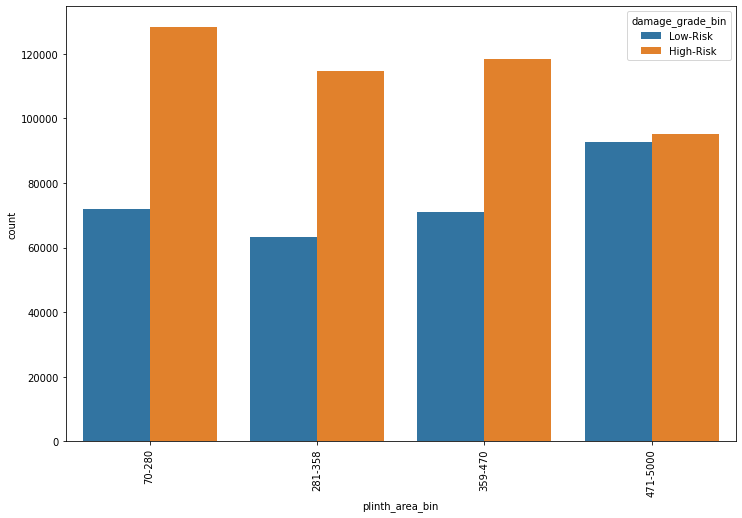

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(bui['plinth_area_bin'], hue=bui['damage_grade_bin'])
plt.xticks(rotation=90)
plt.show()

- Semua kelompok luas bangunan memiliki jumlah kerusakan high-risk yang lebih banyak dari low-risk. Artinya berapapun luas bangunan tidak menentukan level kerusakan

### Kesimpulan


Setelah melakukan analisis yang cukup panjang di atas, saya sampai pada kesimpulan:
1. Bangunan dengan level kerusakan high-risk memiliki beberapa ciri:
  - Memiliki usia di atas 10 tahun
  - Menggunakan pondasi berjenis Mud Mortar-Stone/Brick
  - Menggunakan superstruktur berjenis adobe_mud, mud mortar-stone, stone_flag, mud_mortar_brick, dan timber
  - Menggunakan ground floor berjenis mud dan brick/stone
  - Menggunakan atap berjenis Bamboo/Timber-Heavy roof	dan Bamboo/Timber-Light roof
  - Memiliki posisi Not attached dan Attached 1-side	

2. Bangunan dengan level kerusakan low-risk memiliki beberapa ciri:
  - Memiliki usia dibawah 10 tahun
  - Menggunakan pondasi berjenis Bamboo/Timber, Cement-Stone/Brick, dan RC
  - Menggunakan superstruktur berjenis cement_mortar_stone, cement_mortar_brick, bamboo, dan RC
  - Menggunakan ground floor berjenis RC (reinforced concrete) dan Timber
  - Menggunakan atap berjenis RCC/RB/RBC
  - Memiliki posisi Attached 2-side dan Attached 3-side

3. Untuk meningkatkan ketahanan bangunan terhadap gempa cara yang bisa dilakukan yaitu memperkuat SDM dibidang konstruksi, men-train para tukang bangunan untuk membuat bangunan yang lebih kokoh meski dari material sederhana. Kemudian memperkuat bangunan dengan menggunakan material yang terbaik.

4. Setelah mengetahui level kerusakan tiap bangunan, pemerintah bisa meneruskan dengan menghitung nilai bangunan yang nantinya akan dimasukkan dalam program disaster risk-financing, perencanaan keuangan yang lebih baik untuk menghadapi bencana sewaktu-waktu.

In [ ]:
## export csv ke nama baru untuk next notebook
bui.to_csv('/content/gdrive/My Drive/Colab Notebooks/Nepal/csv_building_structure_clean.csv', index=False)